# อ่านข้อมูลจากไฟล์ CSV ที่ชื่อ "IS Data Test (For Python).csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


โดยใช้ไลบรารี Pandas เพื่อโหลดข้อมูลเข้าสู่ DataFrame ซึ่งเป็นโครงสร้างข้อมูลที่ใช้ใน Pandas เพื่อการจัดการและวิเคราะห์ข้อมูลต่อไป การโหลดข้อมูล CSV

In [ ]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv("/content/IS Data Test (For Python).csv")

# แสดงข้อมูล
print(df)

       Year  Monthnum MonthYear   PART_ID  \
0      2016         1   2016-01  PART0001   
1      2016         2   2016-02  PART0001   
2      2016         3   2016-03  PART0001   
3      2016         4   2016-04  PART0001   
4      2016         5   2016-05  PART0001   
...     ...       ...       ...       ...   
15767  2023         9   2023-09  PART0106   
15768  2023        10  2023- 10  PART0106   
15769  2023        11  2023- 11  PART0106   
15770  2023        12  2023- 12  PART0106   
15771  2024         1   2024-01  PART0106   

                               PART_DETAIL MODEL CATEGORY  SRP_THB  \
0      fr lw garn+rr lw garn+running board  AX03      EXT    23000   
1      fr lw garn+rr lw garn+running board  AX03      EXT    23000   
2      fr lw garn+rr lw garn+running board  AX03      EXT    23000   
3      fr lw garn+rr lw garn+running board  AX03      EXT    23000   
4      fr lw garn+rr lw garn+running board  AX03      EXT    23000   
...                                    

In [ ]:
# คัดเลือกข้อมูลสินค้าที่ถูกใช้กับรถประเภท SUV
suv_data = df[df['MODEL'] == 'SUV']

# แสดงข้อมูลที่คัดเลือก
print(suv_data)


Empty DataFrame
Columns: [Year, Monthnum, MonthYear, PART_ID, PART_DETAIL, MODEL, CATEGORY, SRP_THB, TotalCarQty, TotalPartQty, TotalSalesAmount, PNVR, PR%]
Index: []


# สำรวจข้อมูล โดยใช้ line chart ดูลักษณะ trend ของสินค้าแต่ละประเภท

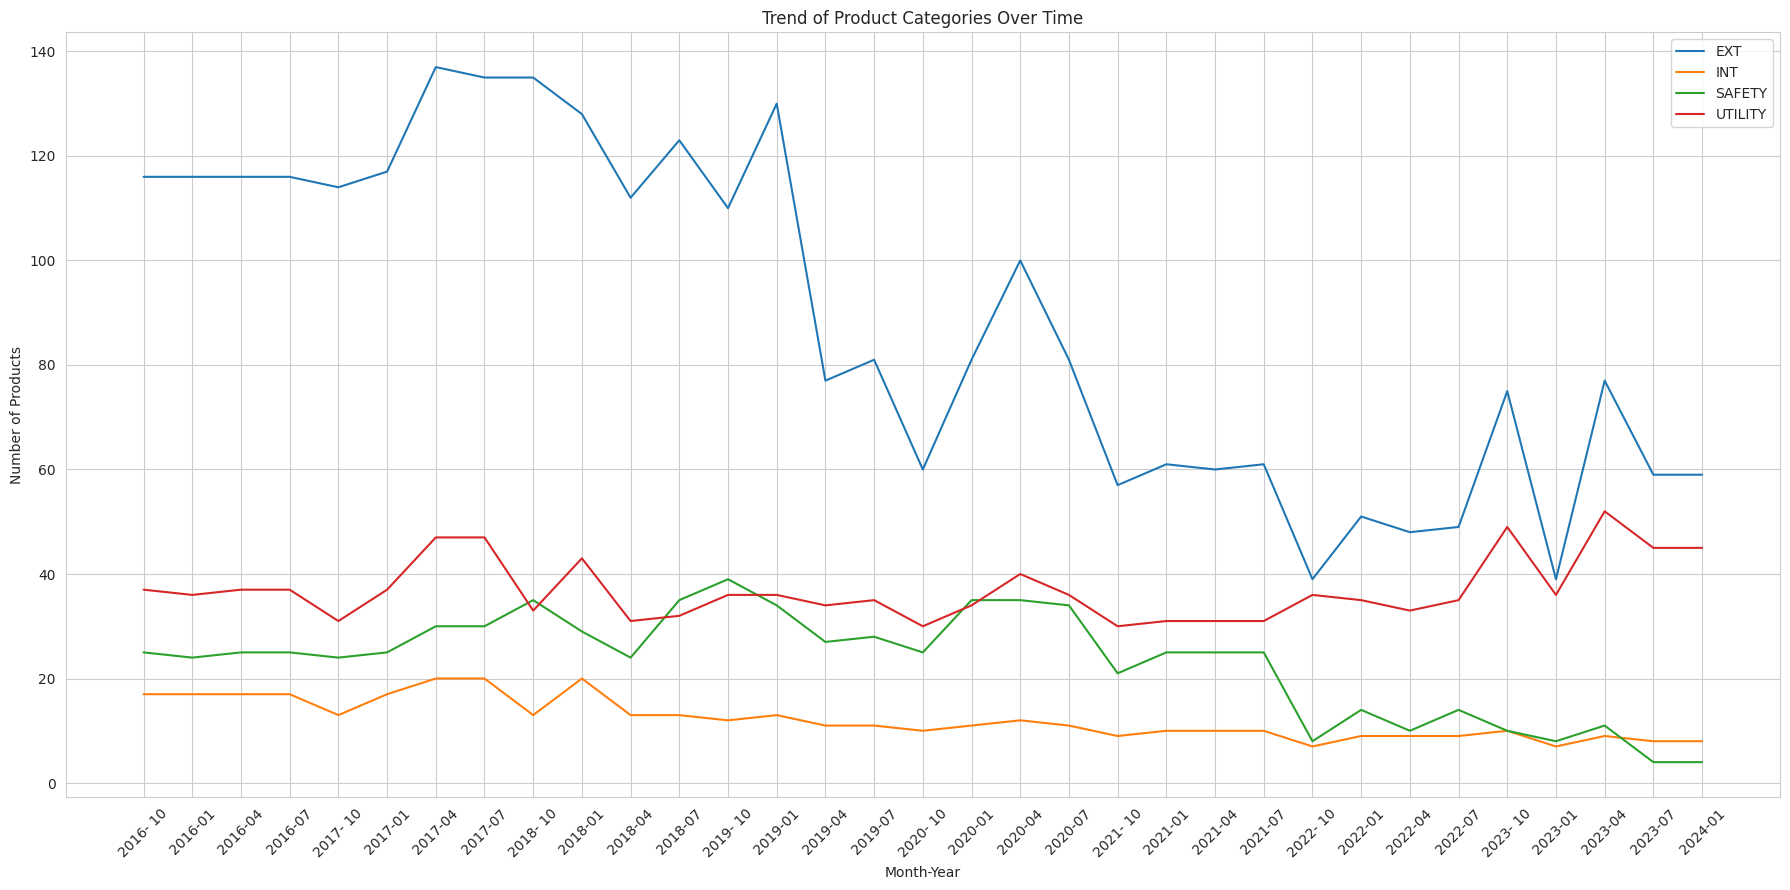

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# สร้างกราฟ line chart แสดงแนวโน้มของสินค้าแต่ละประเภทในแต่ละปีและเดือน
plt.figure(figsize=(18, 9))  # ขยายขนาดกราฟ

# กลุ่มข้อมูลตามประเภท
category_groups = df.groupby('CATEGORY')

for category, data in category_groups:
    # กลุ่มข้อมูลตามปีและเดือนและนับจำนวนสินค้า
    year_month_groups = data.groupby(['Year', 'MonthYear']).size().reset_index(name='Count')

    # เลือกแค่ทุก 3 เดือน
    year_month_groups = year_month_groups[year_month_groups.index % 3 == 0]

    # สร้าง line chart
    plt.plot(year_month_groups['MonthYear'], year_month_groups['Count'], label=category)

# เพิ่มเส้นกริด
plt.grid(True)

# ตกแต่งกราฟ
plt.title('Trend of Product Categories Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# แสดงกราฟ
plt.show()


โค้ดด้านบนนี้สร้างกราฟแบบเส้น (line chart) เพื่อแสดงแนวโน้มของสินค้าแต่ละประเภทในแต่ละปีและเดือน โดยใช้ข้อมูลที่ถูกโหลดเข้ามาจาก DataFrame โดยใช้ Pandas และ Matplotlib สำหรับการพล็อตกราฟ

จะสังเกตได้ว่าประภท EXT ในช่วงปี 2016-2021 มีแนวโน้มจำนวน Products ที่มากกว่าชนิดอื่น ๆ

<ipython-input-200-6fdb20959ef4>:35: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


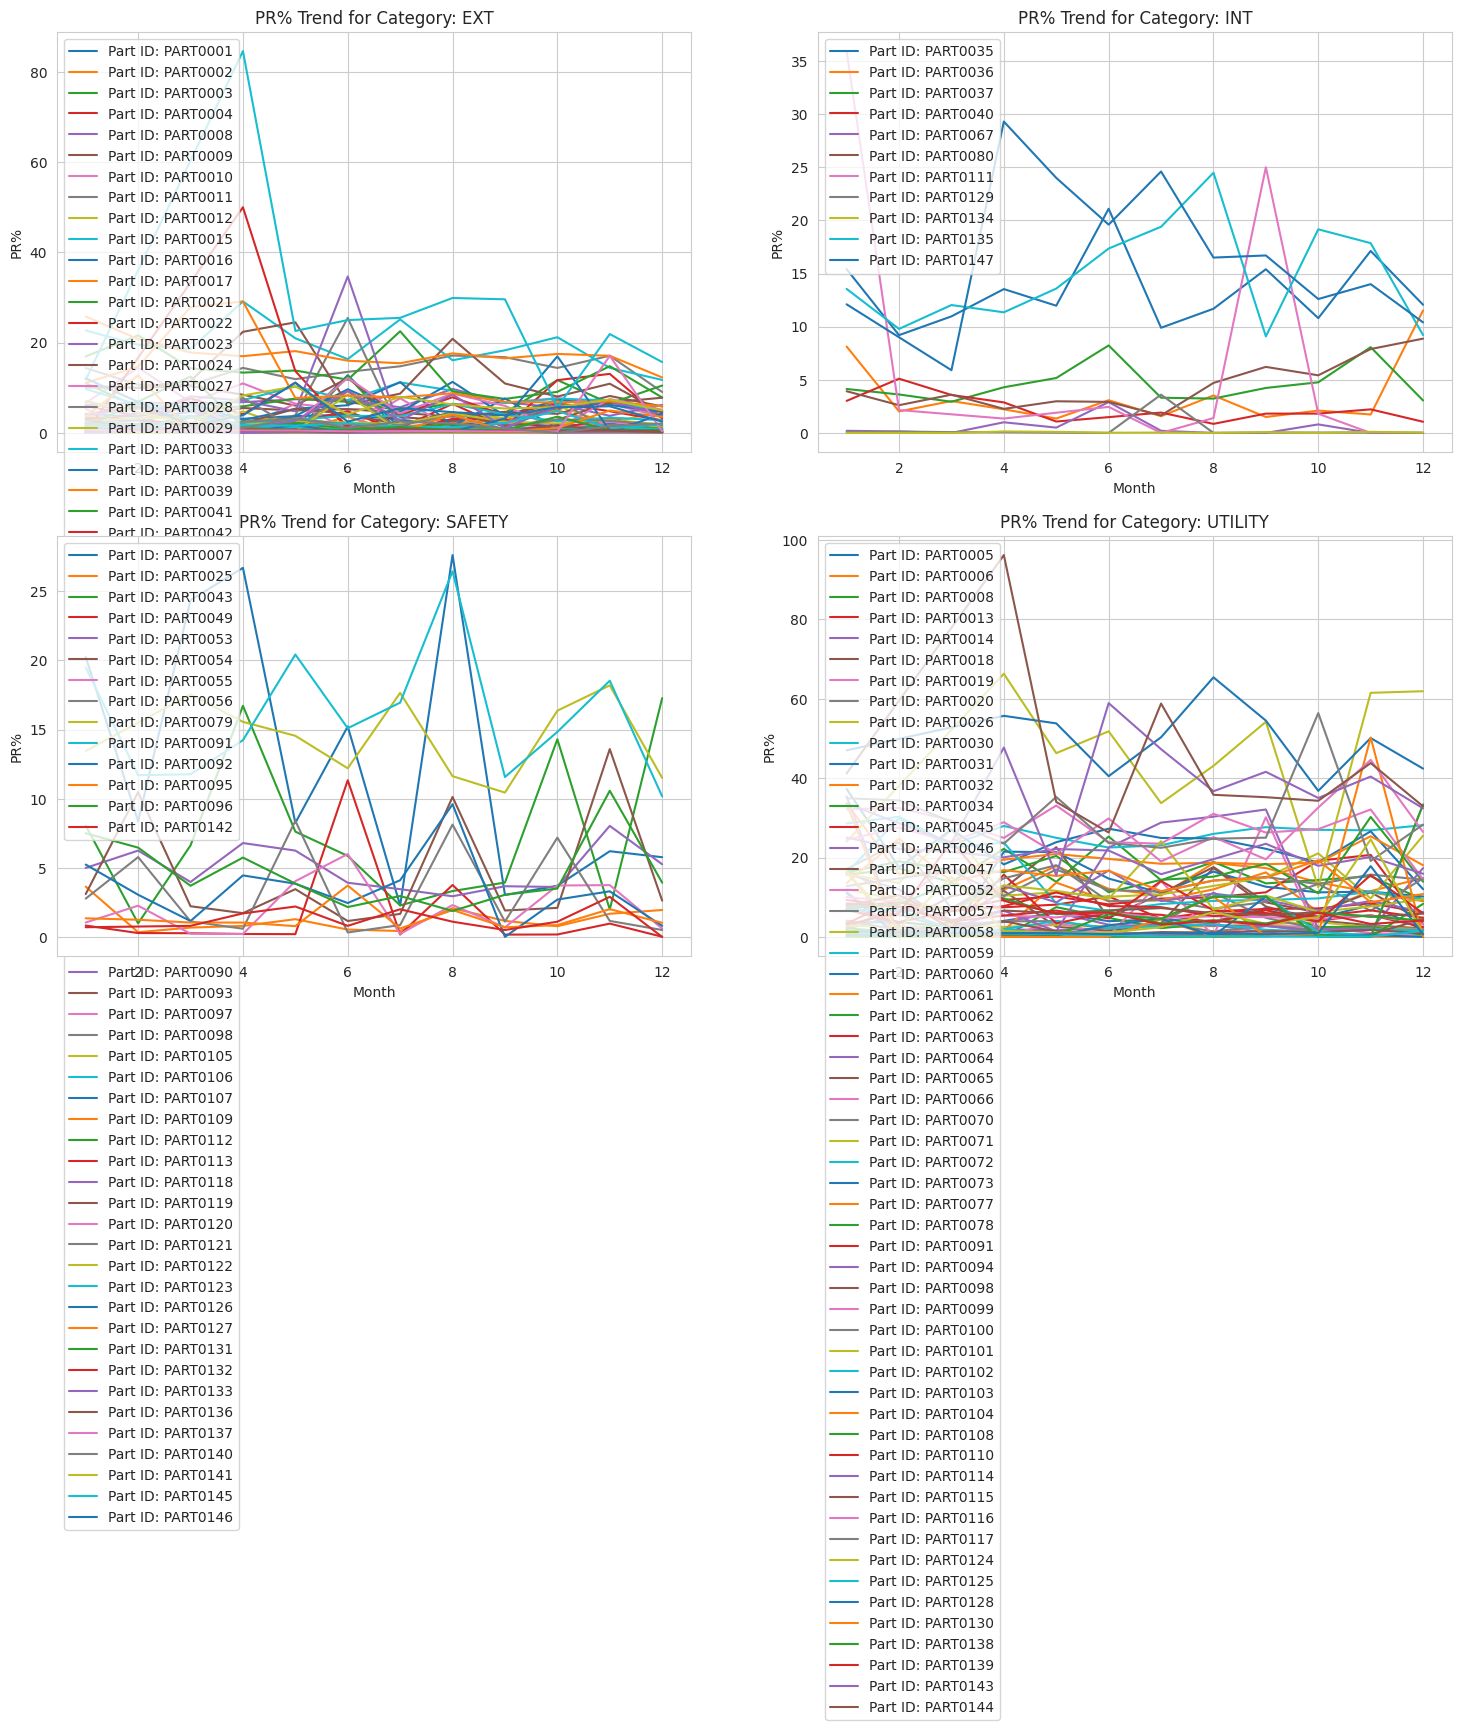

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/IS Data Test (For Python).csv")

# แปลง PR% เป็น numeric
df['PR%'] = df['PR%'].str.replace('%', '').astype(float)

# สร้างกราฟ line chart แสดงความสัมพันธ์ระหว่าง PR% และ เดือน แยกตามหมวดหมู่สินค้า
plt.figure(figsize=(18, 12))  # ขยายขนาดกราฟ

# กลุ่มข้อมูลตามประเภท
category_groups = df.groupby('CATEGORY')

# สร้างสีที่จะใช้ในการพล็อตแต่ละหมวดหมู่สินค้า
colors = ['r', 'g', 'b', 'c']

# วนลูปเพื่อสร้างกราฟแต่ละหมวดหมู่สินค้า
for i, (category, data) in enumerate(category_groups):
    # กลุ่มข้อมูลตามเดือนและคำนวณค่าเฉลี่ยของ PR% ในแต่ละเดือน
    month_groups = data.groupby(['Monthnum', 'PART_ID'])['PR%'].mean().reset_index()

    # สร้าง line chart
    plt.subplot(2, 2, i+1)
    for part_id in month_groups['PART_ID'].unique():
        plt.plot(month_groups[month_groups['PART_ID'] == part_id]['Monthnum'],
                 month_groups[month_groups['PART_ID'] == part_id]['PR%'],
                 label=f'Part ID: {part_id}')
    plt.title(f'PR% Trend for Category: {category}')
    plt.xlabel('Month')
    plt.ylabel('PR%')
    plt.legend()

# ปรับแต่งรายละเอียดกราฟทั้งหมด
plt.tight_layout()

# แสดงกราฟ
plt.show()


# จัดการ missing value สำรวจข้อมูลของเรา และแปลงให้คอลัมภ์ PR% = Labelปรับให้เป็นค่าร้อยละ เช่น 3% = 0.03

In [ ]:
df = pd.read_csv("/content/IS Data Test (For Python).csv")

# แปลงข้อมูล PR% จาก string เป็น float  เพื่อเปลี่ยนเป็นร้อยละ
df['PR%'] = df['PR%'].str.rstrip('%').astype('float')

# แปลงข้อมูล PR% โดยการหารด้วย 10 เพื่อเปลี่ยนเป็นร้อยละ
df['PR%'] = df['PR%'] / 10

df

,Year,Monthnum,MonthYear,PART_ID,PART_DETAIL,MODEL,CATEGORY,SRP_THB,TotalCarQty,TotalPartQty,TotalSalesAmount,PNVR,PR%
0,2016,1,2016-01,PART0001,fr lw garn+rr lw garn+running board,AX03,EXT,23000,239,0,0,0,0.00
1,2016,2,2016-02,PART0001,fr lw garn+rr lw garn+running board,AX03,EXT,23000,1461,4,69000,47,0.03
2,2016,3,2016-03,PART0001,fr lw garn+rr lw garn+running board,AX03,EXT,23000,1866,7,120750,65,0.04
3,2016,4,2016-04,PART0001,fr lw garn+rr lw garn+running board,AX03,EXT,23000,807,7,120750,150,0.09
4,2016,5,2016-05,PART0001,fr lw garn+rr lw garn+running board,AX03,EXT,23000,790,17,293250,371,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15767,2023,9,2023-09,PART0106,NaN,OR04,EXT,14990,203,9,102678,506,0.44
15768,2023,10,2023- 10,PART0106,NaN,OR04,EXT,14990,175,4,44968,257,0.23
15769,2023,11,2023- 11,PART0106,NaN,OR04,EXT,14990,136,5,56210,413,0.37
15770,2023,12,2023- 12,PART0106,NaN,OR04,EXT,14990,240,10,113170,472,0.42


In [ ]:
# ตรวจสอบค่าที่หายไปในแต่ละคอลัมน์
missing_values = df.isna().sum()

# แสดงผลลัพธ์
print(missing_values)


Year                   0
Monthnum               0
MonthYear              0
PART_ID                0
PART_DETAIL         8575
MODEL                  0
CATEGORY               0
SRP_THB                0
TotalCarQty            0
TotalPartQty           0
TotalSalesAmount       0
PNVR                   0
PR%                    0
dtype: int64


โค้ดด้านบนนี้ใช้สำหรับตรวจสอบค่าที่ขาดหายไปในแต่ละคอลัมน์ของ DataFrame และแสดงผลลัพธ์ออกมาเพื่อตรวจสอบว่ามีคอลัมน์ไหนมีค่าที่ขาดหายไปบ้าง นอกจากนี้การทำคำสั่ง .isna() จะสร้าง DataFrame ใหม่ที่มีค่า True ในตำแหน่งที่มีค่าที่ขาดหายไปและ False ในตำแหน่งที่มีข้อมูล จากนั้นการใช้ .sum() จะนับจำนวนค่า True ในแต่ละคอลัมน์เพื่อหาผลรวมของค่าที่ขาดหายไปในแต่ละคอลัมน์

ผลลัพธ์ที่ได้จะแสดงจำนวนของค่าที่ขาดหายไปในแต่ละคอลัมน์ในที่นี้จะเห็นว่ามี คอลัมน์ของ PART_DETAIL มีค่าที่หายไป 8575 จำนวน

# ทำการ cleaned data

การทำเช่นนี้อาจมีวัตถุประสงค์เพื่อทำความสะอาดข้อมูลโดยการลบแถวที่มีข้อมูลที่ไม่สมบูรณ์หรือไม่ครบถ้วนออก หรืออาจจะเป็นเพราะเราต้องการทำการวิเคราะห์เฉพาะข้อมูลที่มีความสำคัญในคอลัมน์ 'PART_DETAIL' เท่านั้น โดยไม่สนใจข้อมูลในแถวที่ไม่มี 'PART_DETAIL' ทั้งนี้ขึ้นอยู่กับวัตถุประสงค์และการใช้งานของข้อมูลในแต่ละกรณี

โค้ดด้านบนนี้ดำเนินการลบแถวที่มีค่าที่ขาดหายไปในคอลัมน์ 'PART_DETAIL'

In [ ]:
# ลบคอลัมน์ "MonthYear" ออกจาก DataFrame
df.drop(columns=['MonthYear'], inplace=True)


ลบคอลัมน์ที่ไม่จำเป็นออกจาก DataFrame จะช่วยลดขนาดของข้อมูลและทำให้การจัดการข้อมูลเป็นไปได้สะดวกมากขึ้น

In [ ]:
# ลบคอลัมน์ "PART_DETAIL" ออกจาก DataFrame
df.drop(columns=['PART_DETAIL'], inplace=True)


ลบคอลัมน์ที่ไม่จำเป็นออกจาก DataFrame จะช่วยลดขนาดของข้อมูลและทำให้การจัดการข้อมูลเป็นไปได้สะดวกมากขึ้น

In [ ]:
# ลบคอลัมน์ "PART_ID" ออกจาก DataFrame
# df.drop(columns=['PART_ID'], inplace=True)

# ใช้แยกสตริงเพื่อเอาเฉพาะตัวเลขหลังสตริงคำนำหน้าแทน
df['PART_ID'] = df['PART_ID'].apply(lambda x: int(x[4:]))


**การลบคอลัมน์อาจทำเพื่อหลายวัตถุประสงค์ เช่น:**

*   ลบคอลัมน์ที่ไม่จำเป็น: บางครั้งมีคอลัมน์ใน DataFrame ที่ไม่มีความสำคัญต่อการวิเคราะห์หรือโมเดล การลบคอลัมน์เหล่านั้นออกจะช่วยลดความซับซ้อนของข้อมูลและเพิ่มประสิทธิภาพในการประมวลผล
*   
ลบคอลัมน์ที่มีข้อมูลไม่ครบถ้วน: หากมีคอลัมน์ที่มีข้อมูลขาดหายไปมาก เราอาจพิจารณาที่จะลบคอลัมน์นั้นออกเพื่อป้องกันการสร้างข้อมูลที่ไม่สมบูรณ์หรือเกิดการสับสนในการวิเคราะห์



*   ลบคอลัมน์ที่มีความสัมพันธ์สูง: หากมีคอลัมน์ที่มีความสัมพันธ์สูงกับคอลัมน์อื่น ๆ ใน DataFrame อาจพิจารณาที่จะลบคอลัมน์หนึ่งในคู่ของคอลัมน์นั้นออก เพื่อลดความซับซ้อนและป้องกันการเกิดปัญหาการล่วงละเมิด (multicollinearity) ในการวิเคราะห์หรือการสร้างโมเดล
*   ลบคอลัมน์ที่ไม่เกี่ยวข้อง: หากมีคอลัมน์ที่ไม่มีความเกี่ยวข้องกับวัตถุประสงค์หรือคำถามที่ต้องการตอบ การลบคอลัมน์เหล่านั้นออกอาจช่วยให้การวิเคราะห์เป็นไปได้มากขึ้น



สรุปคือการลบคอลัมน์เป็นวิธีที่สำคัญในการจัดการข้อมูลเพื่อให้ข้อมูลมีความเกี่ยวข้องและสมบูรณ์ต่อการวิเคราะห์และการนำเสนอข้อมูล

# boxplot แสดงค่าแต่ละฟีเจอร์ก่อนทำ  Normalization ข้อมูล

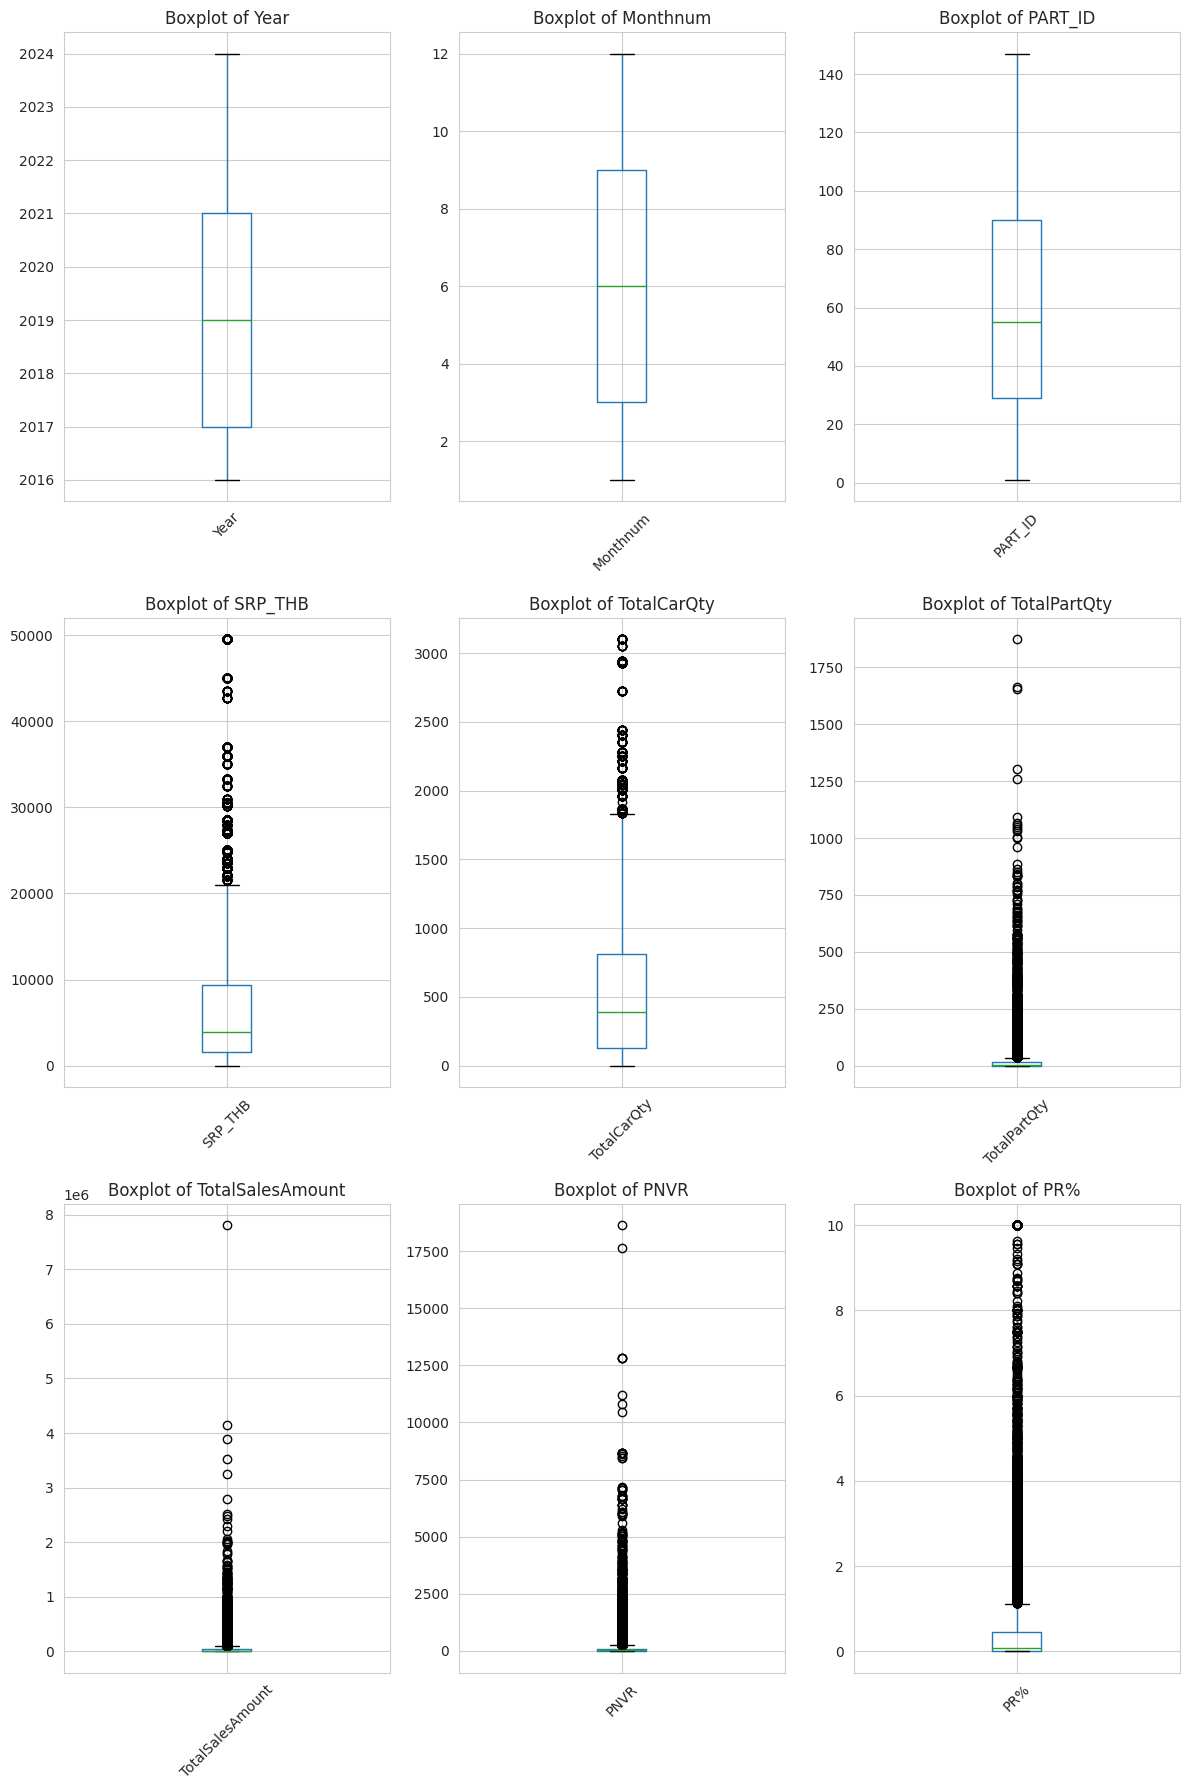

In [ ]:
plt.figure(figsize=(12, 18))  # เพิ่มความสูงของกราฟเพื่อให้มองเห็นได้ชัดเจน
for i, column in enumerate(['Year', 'Monthnum', 'PART_ID' , 'SRP_THB', 'TotalCarQty', 'TotalPartQty', 'TotalSalesAmount', 'PNVR', 'PR%'], start=1):
    plt.subplot(3, 3, i)
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)  # หมุนแกน x ให้สะดวกต่อการอ่าน
plt.tight_layout()
plt.show()


พล็อตแบบเจาะเข้าไปทีละอัน

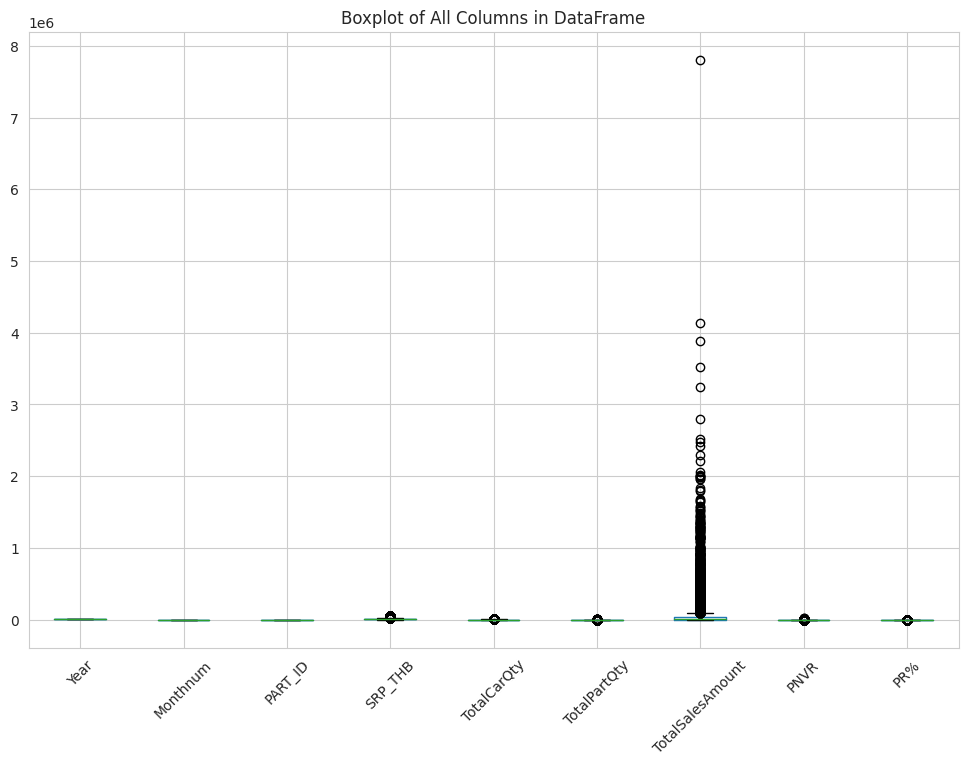

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplot of All Columns in DataFrame')
plt.xticks(rotation=45)  # หมุนแกน x ให้สะดวกต่อการอ่าน
plt.show()


พล็อตแบบรวม ๆ

# โค้ดนี้ใช้ MinMaxScaler จาก scikit-learn เพื่อปรับปรุงค่าของคอลัมน์ที่เลือกให้อยู่ในช่วง [0, 1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# เลือกคอลัมน์ที่ต้องการทำ Normalization ข้อมูล
columns_to_normalize = ['SRP_THB', 'TotalCarQty', 'TotalPartQty', 'TotalSalesAmount', 'PNVR']

# สร้าง MinMaxScaler object
scaler = MinMaxScaler()

# ทำการ Normalize ข้อมูล
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])



โค้ดด้านบนนี้ใช้ MinMaxScaler จาก scikit-learn

*   เพื่อปรับปรุงค่าของคอลัมน์ที่เลือกให้อยู่ในช่วง [0, 1] โดยทำการ Normalize ข้อมูลของคอลัมน์ที่ระบุไว้ใน columns_to_normalize ใน DataFrame df

*   การทำ Normalize จะช่วยให้ค่าของคอลัมน์อยู่ในช่วงที่เดียวกัน ทำให้การวิเคราะห์และการเปรียบเทียบข้อมูลที่ถูก Normalize มีความสมเหตุสมผลมากยิ่งขึ้น และสามารถช่วยลดผลกระทบจากการแปรผันของข้อมูลได้ในบางกรณี



# boxplot แสดงค่าแต่ละฟีเจอร์หลังทำ Normalization ข้อมูล

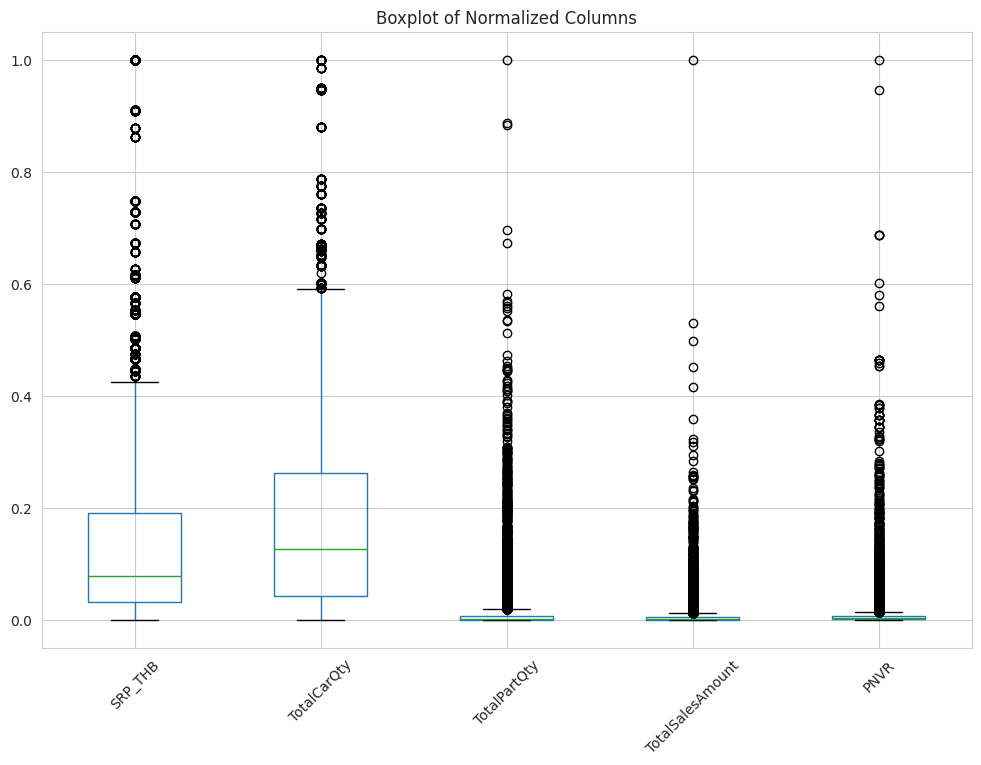

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(column=['SRP_THB', 'TotalCarQty', 'TotalPartQty', 'TotalSalesAmount', 'PNVR'])
plt.title('Boxplot of Normalized Columns')
plt.xticks(rotation=45)  # หมุนแกน x ให้สะดวกต่อการอ่าน
plt.show()


พล็อตแบบเจาะเข้าไปทีละอัน

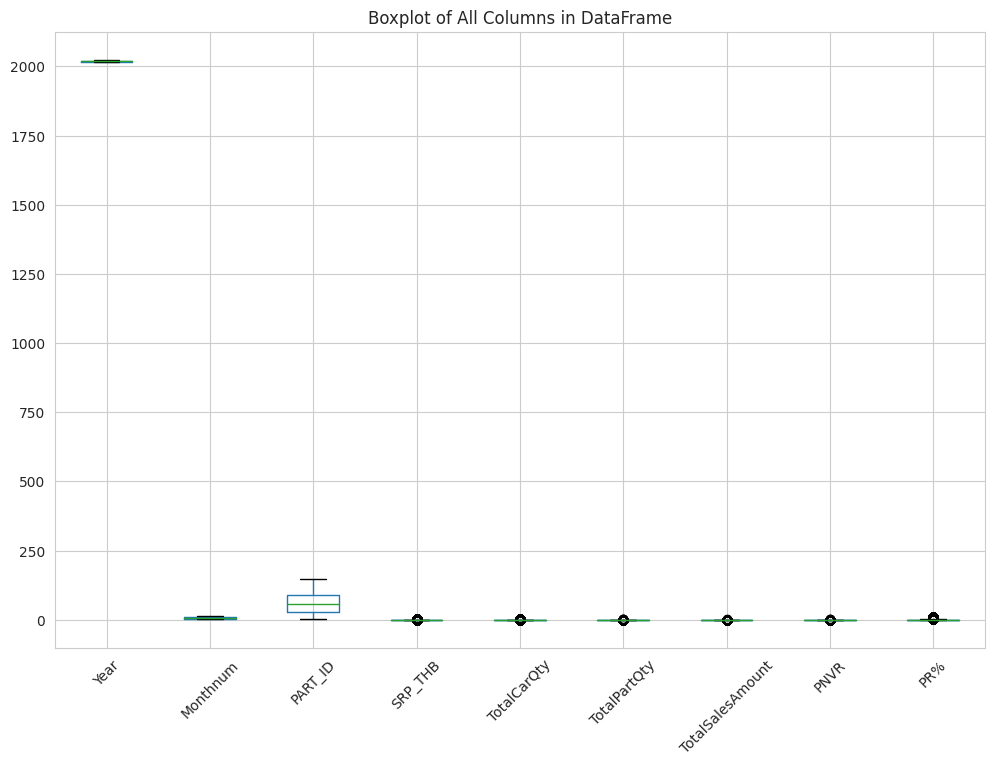

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplot of All Columns in DataFrame')
plt.xticks(rotation=45)  # หมุนแกน x ให้สะดวกต่อการอ่าน
plt.show()


พล็อตแบบรวม ๆ

# ใช้ฟังก์ชัน map() เพื่อนำค่าเดิมในคอลัมน์ "MODEL" ไปแทนที่ด้วยค่าใหม่ตาม mapping ที่กำหนด โดย transformation data ที่ถูกเก็บแบบตัวอักษรให้เป็นตัวเลข (Normalization)

หากต้องการใช้ค่าที่เป็นข้อความในคอลัมน์ "MODEL" แต่ต้องการแปลงเป็นตัวเลขหรือค่าอื่นๆ เพื่อให้สามารถนำมาใช้ในการวิเคราะห์ข้อมูลได้ เราสามารถใช้การแปลงค่าเป็นตัวเลขที่เข้าใจง่าย โดยการใช้เลขหรือรหัสแทนแต่ละค่าข้อความ ตัวอย่างเช่น ให้ "AX03" เป็น 1, "GA01" เป็น 2, "CH02" เป็น 3, และ "OR04" เป็น 4 ซึ่งเป็นเพียงตัวอย่างเท่านั้นครับ

In [ ]:
# สร้าง mapping ของค่าใหม่ที่ต้องการให้แทนที่ค่าเดิมสำหรับ "MODEL" และ "CATEGORY"
model_mapping = {'AX03': 1, 'GA01': 2, 'CH02': 3, 'OR04': 4}
category_mapping = {'EXT': 1, 'UTILITY': 2, 'SAFETY': 3, 'INT': 4}

# ใช้ฟังก์ชัน map เพื่อแปลงค่าในคอลัมน์ "MODEL" ตาม mapping ที่กำหนด
df['MODEL'] = df['MODEL'].map(model_mapping)

# ใช้ฟังก์ชัน map เพื่อแปลงค่าในคอลัมน์ "CATEGORY" ตาม mapping ที่กำหนด
df['CATEGORY'] = df['CATEGORY'].map(category_mapping)

# แสดงข้อมูลหลังจากแปลงทั้ง "MODEL" และ "CATEGORY"
df


,Year,Monthnum,PART_ID,MODEL,CATEGORY,SRP_THB,TotalCarQty,TotalPartQty,TotalSalesAmount,PNVR,PR%
0,2016,1,1,1,1,0.464646,0.077122,0.000000,0.000223,0.001233,0.00
1,2016,2,1,1,1,0.464646,0.471442,0.002136,0.009058,0.003752,0.03
2,2016,3,1,1,1,0.464646,0.602130,0.003737,0.015684,0.004717,0.04
3,2016,4,1,1,1,0.464646,0.260407,0.003737,0.015684,0.009274,0.09
4,2016,5,1,1,1,0.464646,0.254921,0.009076,0.037772,0.021120,0.22
...,...,...,...,...,...,...,...,...,...,...,...
15767,2023,9,106,4,1,0.302828,0.065505,0.004805,0.013370,0.028357,0.44
15768,2023,10,106,4,1,0.302828,0.056470,0.002136,0.005981,0.015009,0.23
15769,2023,11,106,4,1,0.302828,0.043885,0.002670,0.007420,0.023372,0.37
15770,2023,12,106,4,1,0.302828,0.077444,0.005339,0.014713,0.026534,0.42


# ลบสัญลักษณ์ % ออกจากคอลัมน์ PR% เพื่อทำ Feature Selection

In [ ]:
# import pandas as pd

# # ลบสัญลักษณ์ % ออกจากคอลัมน์ PR%
# df['PR%'] = df['PR%'].str.replace('%', '')

# # เปลี่ยนชนิดข้อมูลของคอลัมน์ PR% เป็นตัวเลข
# df['PR%'] = pd.to_numeric(df['PR%'])

# # ต่อมาคุณสามารถใช้โค้ดเดิมเพื่อพล็อต Heatmap ความสัมพันธ์ได้
# df

ตอนนี้เราก็จะได้เห็นว่าข้อมูลของเราได้ถูก Normalization และทำการ Map() เรียบร้อยแล้ว

# Feature Selection เพื่อเลือกคุณลักษณะหรือคุณสมบัติที่มีผลต่อการทำนายของโมเดลอย่างมีประสิทธิภาพมากที่สุด

การสร้าง Heatmap เพื่อดูความสัมพันธ์ระหว่างคุณสมบัติ (features) ในข้อมูลเป็นวิธีหนึ่งในการทำ Feature Selection โดยใช้ค่าความสัมพันธ์ (correlation) เพื่อดูความสัมพันธ์ระหว่างคู่คุณสมบัติที่ต่างกัน ค่าความสัมพันธ์อาจจะอยู่ในช่วงระหว่าง -1 ถึง 1:

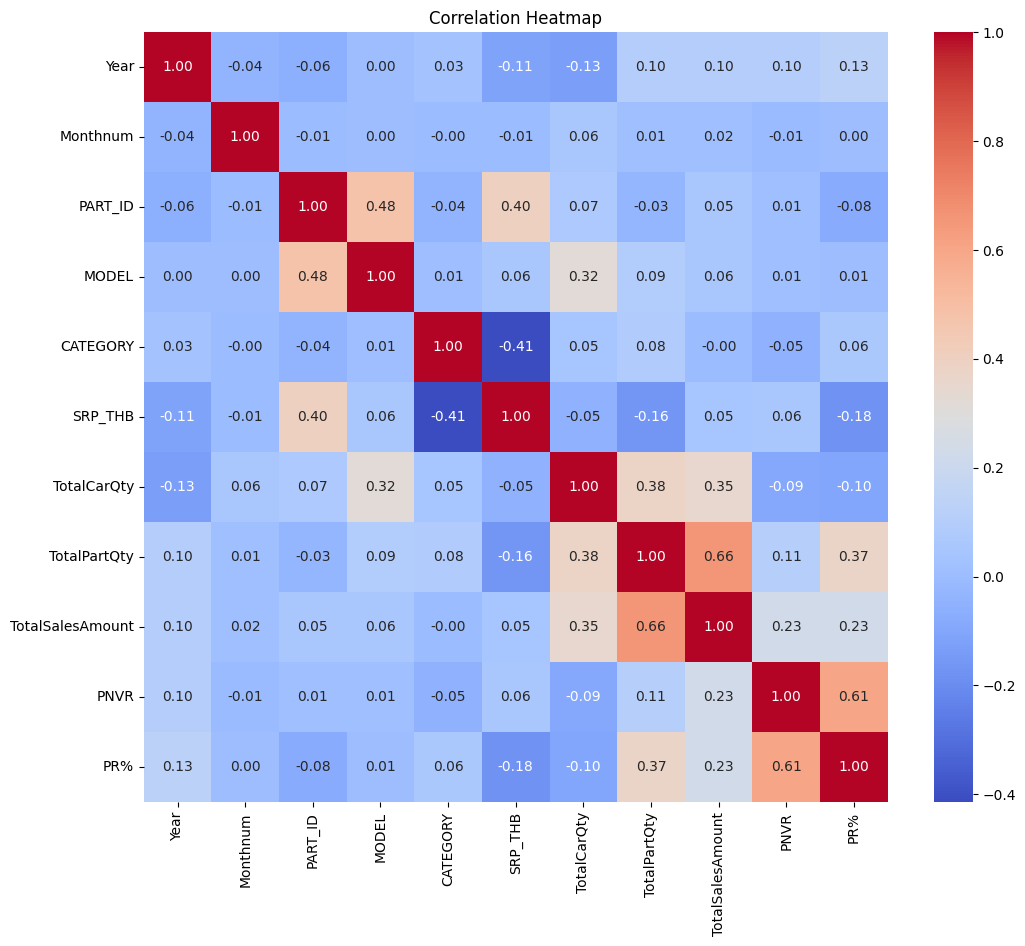

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณค่าความสัมพันธ์ระหว่างคุณสมบัติแต่ละคู่
correlation_matrix = df.corr()

# พล็อต Heatmap เพื่อแสดงค่าความสัมพันธ์
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**ความหมายของค่าใน -1 ถึง 1**

*   ค่าเป็นบวก: หมายถึงความสัมพันธ์บวก ซึ่งหมายความว่าเมื่อค่าของคุณสมบัติหนึ่งเพิ่มขึ้น ค่าของคุณสมบัติอีกคุณสมบัติหนึ่งจะเพิ่มขึ้นด้วย

*   ค่าเป็นลบ:หมายถึงความสัมพันธ์ลบ ซึ่งหมายความว่าเมื่อค่าของคุณสมบัติหนึ่งเพิ่มขึ้น ค่าของคุณสมบัติอีกคุณสมบัติหนึ่งจะลดลง

*  ค่าเป็นศูนย์: หมายถึงไม่มีความสัมพันธ์ระหว่างคู่คุณสมบัติ

การตรวจสอบความสัมพันธ์ระหว่างคุณสมบัติที่มีใน Heatmap ช่วยในการเลือกคุณสมบัติที่มีความสำคัญสำหรับการวิเคราะห์หรือการสร้างโมเดลต่อไป โดยความสัมพันธ์ที่มีค่าสูง (บวกหรือลบ) อาจบ่งชี้ถึงคุณสมบัติที่สำคัญและมีผลต่อตัวแปรตาม เพื่อนำไปใช้ในการวิเคราะห์หรือการสร้างโมเดลต่อไปในการทำนายผลลัพธ์ของข้อมูล

แสดงให้เห็นว่ามีความสัมพันธ์ที่มีความสัมพันธ์สูงมากโดยเราสามารถเลือกคุณสมบัติที่มีความสัมพันธ์สูงสุดโดยดูจาก Heatmap และทำการเลือกเฉพาะคุณสมบัติที่สนใจเพื่อนำไปใช้ในการทำนายต่อไปครับ





**การปรับเรียบข้อมูลหรือไม่ ?

*  จะขึ้นอยู่กับลักษณะของข้อมูลและวัตถุประสงค์ของการทำนาย หากพบว่าการปรับเรียบข้อมูลเป็นเรื่องที่เหมาะสม เช่น การแปลงค่าของคอลัมน์ให้อยู่ในช่วงค่าเดียวกันหรือการลดขนาดของข้อมูลเพื่อลดซับซ้อน

*   สามารถทำได้โดยใช้เทคนิคที่เหมาะสม เช่น Standardization หรือ Normalization ตามลำดับครับ



# feature selection ด้วย Recursive Feature Elimination (RFE)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector

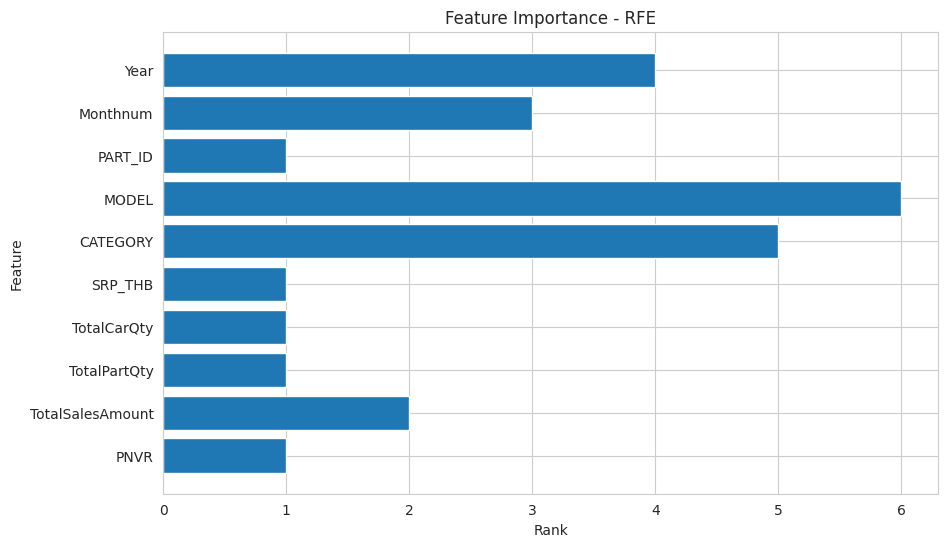


Selected features (RFE): Index(['PART_ID', 'SRP_THB', 'TotalCarQty', 'TotalPartQty', 'PNVR'], dtype='object')


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# กำหนดค่า X และ y
X = df.drop(['PR%'], axis=1)
y = df['PR%']

# สร้างโมเดลที่จะใช้ใน RFE (ในที่นี้ใช้ RandomForestRegressor)
model = RandomForestRegressor()

# กำหนด RFE
rfe = RFE(model, n_features_to_select=5)  # เลือกจำนวนคุณลักษณะที่ต้องการให้เหลือ 5 คุณลักษณะ

# Fit RFE กับข้อมูล
rfe.fit(X, y)

# แสดงความสำคัญของคุณลักษณะ
selected_features_rfe = X.columns[rfe.support_]
feature_ranks_rfe = rfe.ranking_

# Plot ความสำคัญของคุณลักษณะ
plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), feature_ranks_rfe)
plt.title('Feature Importance - RFE')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.yticks(range(len(X.columns)), X.columns)
plt.gca().invert_yaxis()
plt.show()

# แสดงคุณลักษณะที่ถูกเลือก
print()
print("Selected features (RFE):", selected_features_rfe)


ในที่นี้เลือกใช้จำนวนคุณลักษณะ 5 ค่า ที่สำคัญที่สุดมาดู โดยวิธีนี้จะเลือกคุณลักษณะที่สำคัญที่สุดที่สามารถอธิบายการเปลี่ยนแปลงของตัวแปรตาม (dependent variable) ได้อย่างมีประสิทธิภาพ

# L1-based feature selection:

Selected Features (L1-based feature selection):
Rank 9: Year
Rank 8: Monthnum
Rank 7: PART_ID
Rank 6: MODEL
Rank 5: CATEGORY
Rank 4: SRP_THB
Rank 3: TotalCarQty
Rank 2: TotalPartQty
Rank 1: PNVR


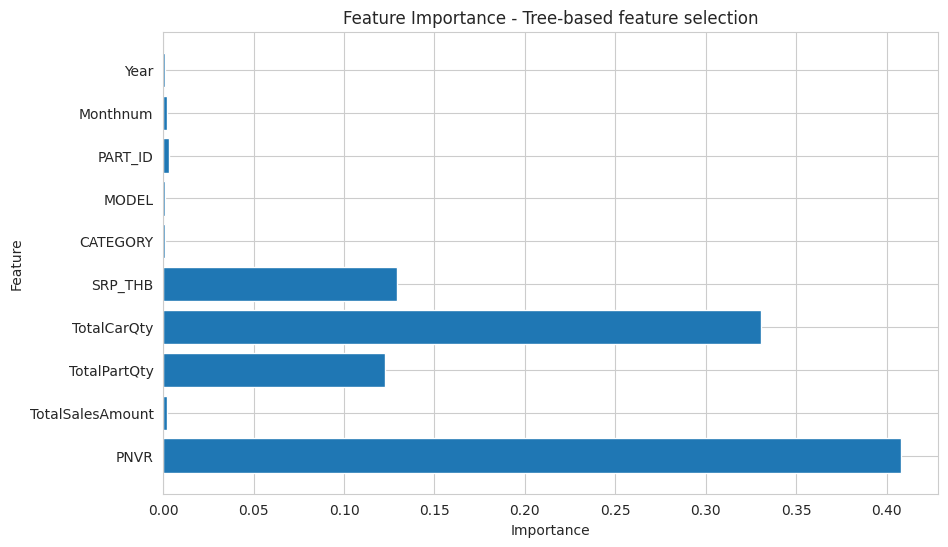

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# กำหนดค่า X และ y
X = df.drop(['PR%'], axis=1)
y = df['PR%']

# L1-based feature selection
lasso_model = Lasso(alpha=0.01)  # กำหนดค่า alpha สำหรับ L1 regularization
lasso_model.fit(X, y)

feature_selection_model = SelectFromModel(lasso_model)
feature_selection_model.fit(X, y)
selected_features_l1 = X.columns[feature_selection_model.get_support()]

print("Selected Features (L1-based feature selection):")
for i, feature in enumerate(selected_features_l1, start=1):
    print(f"Rank {len(selected_features_l1) - i + 1}: {feature}")

# Tree-based feature selection
model_tree = RandomForestRegressor()
model_tree.fit(X, y)

plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), model_tree.feature_importances_)
plt.title('Feature Importance - Tree-based feature selection')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(range(len(X.columns)), X.columns)
plt.gca().invert_yaxis()
plt.show()


# Backward Sequential Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['PR%'], axis=1)
y = df['PR%']

# สร้างโมเดล RandomForestRegressor
rf_model = RandomForestRegressor()

# กำหนดจำนวนคุณลักษณะที่ต้องการเลือก
k_features = 5  # ลดจำนวนคุณลักษณะที่ต้องการทำ Backward Sequential Feature Selection

# กำหนดเกณฑ์ที่ใช้ในการเลือกคุณลักษณะ (ในที่นี้ใช้ค่าความสัมพันธ์)
backward_selection = SFS(rf_model,
                         k_features=k_features,
                         forward=False,
                         scoring='r2',
                         cv=3)

# Fit โมเดล RandomForestRegressor
rf_model.fit(X, y)

# Fit และทำการเลือกคุณลักษณะ
backward_selection.fit(X, y)


SequentialFeatureSelector(cv=3, estimator=RandomForestRegressor(),
                          forward=False, k_features=(5, 5), scoring='r2')

Selected Features (Backward Sequential Feature Selection): ['Year', 'MODEL', 'CATEGORY', 'TotalCarQty', 'TotalPartQty']



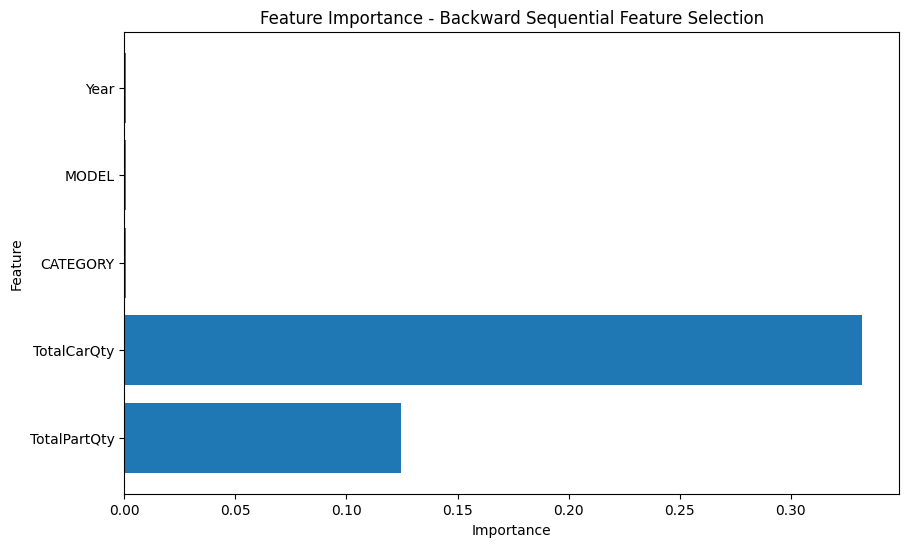

In [ ]:
# แสดงคุณลักษณะที่ถูกเลือก
selected_features_backward = list(backward_selection.k_feature_names_)
print("Selected Features (Backward Sequential Feature Selection):", selected_features_backward)
print()
# Plot ความสำคัญของคุณลักษณะจาก Backward Sequential Feature Selection
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features_backward)), [rf_model.feature_importances_[i] for i in backward_selection.k_feature_idx_])
plt.title('Feature Importance - Backward Sequential Feature Selection')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(range(len(selected_features_backward)), selected_features_backward)
plt.gca().invert_yaxis()
plt.show()

ค่า k_features ถูกตั้งเป็น 'best' เพื่อให้วิธีการเลือกคุณลักษณะเลือกจำนวนคุณลักษณะที่ดีที่สุดสำหรับแต่ละรอบ ส่วน forward=False แสดงถึงการใช้ Backward Sequential Feature Selection ในการลดจำนวนคุณลักษณะลงจากที่มีอยู่ในชุดข้อมูล

# หลังจากการทำ Feature Selection เราพบว่าคอมลัมภ์ monthnum กับ model ไม่มีความสัมพันธ์กับ label PR% เลยต้องการลบออกไม่ใช่ในการฝึกโมเดล

In [ ]:
# ลบคอลัมน์ "PART_DETAIL" ออกจาก DataFrame
df.drop(columns=['Monthnum'], inplace=True)

# ลบคอลัมน์ "MODEL" ออกจาก DataFrame
df.drop(columns=['MODEL'], inplace=True)



# แบ่งชุดข้อมูลเป็น Train และ Test โดยใช้สัดส่วน 70%, 30% และแสดงขนาดของข้อมูล

Train data size: (11040, 9)
Test data size: (4732, 9)


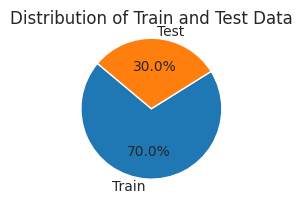

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# แบ่งชุดข้อมูลเป็น Train และ Test โดยใช้สัดส่วน 70%, 30%
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# แสดงขนาดของชุดข้อมูล Train และ Test
print("Train data size:", train_data.shape)
print("Test data size:", test_data.shape)

# กำหนดขนาดของกราฟ
plt.figure(figsize=(2, 2))

# สร้างข้อมูลสำหรับพล็อต
sizes = [train_data.shape[0], test_data.shape[0]]
labels = ['Train', 'Test']

# พล็อตกราฟวงกลม
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# กำหนดรายละเอียดเพิ่มเติม
plt.axis('equal')  # ทำให้วงกลมเป็นรูปวงกลมแท้
plt.title('Distribution of Train and Test Data')

# แสดงกราฟ
plt.show()

# ตรวจสอบข้อมูลก่อนอีกที ก่อนจะสร้าง MODEL

ถ้าไม่มีค่าที่หายไปแสดงว่าข้อมูลเรียบร้อยพร้อมใช้งานครับ

In [ ]:
# ตรวจสอบค่าที่หายไปในแต่ละคอลัมน์
missing_values = df.isna().sum()

# แสดงผลลัพธ์
print(missing_values)


Year                0
PART_ID             0
CATEGORY            0
SRP_THB             0
TotalCarQty         0
TotalPartQty        0
TotalSalesAmount    0
PNVR                0
PR%                 0
dtype: int64


In [ ]:
df

,Year,PART_ID,CATEGORY,SRP_THB,TotalCarQty,TotalPartQty,TotalSalesAmount,PNVR,PR%
0,2016,1,1,0.464646,0.077122,0.000000,0.000223,0.001233,0.00
1,2016,1,1,0.464646,0.471442,0.002136,0.009058,0.003752,0.03
2,2016,1,1,0.464646,0.602130,0.003737,0.015684,0.004717,0.04
3,2016,1,1,0.464646,0.260407,0.003737,0.015684,0.009274,0.09
4,2016,1,1,0.464646,0.254921,0.009076,0.037772,0.021120,0.22
...,...,...,...,...,...,...,...,...,...
15767,2023,106,1,0.302828,0.065505,0.004805,0.013370,0.028357,0.44
15768,2023,106,1,0.302828,0.056470,0.002136,0.005981,0.015009,0.23
15769,2023,106,1,0.302828,0.043885,0.002670,0.007420,0.023372,0.37
15770,2023,106,1,0.302828,0.077444,0.005339,0.014713,0.026534,0.42


# 'PR%' ที่ยังมีเครื่องหมายเปอร์เซ็นต์ (%) อยู่ ซึ่งไม่สามารถแปลงไปเป็นตัวเลขได้โดยตรง เราจำเป็นต้องทำการลบเครื่องหมายเปอร์เซ็นต์ออกก่อนที่จะสามารถใช้งานโมเดลได้

In [ ]:
# # ลบเครื่องหมายเปอร์เซ็นต์จากคอลัมน์ 'PR%'
# train_data['PR%'] = train_data['PR%'].str.replace('%', '').astype(float)
# test_data['PR%'] = test_data['PR%'].str.replace('%', '').astype(float)


โค้ดด้านบนใช้ฟังก์ชัน str.replace() เพื่อลบเครื่องหมายเปอร์เซ็นต์ '%' ออกจากคอลัมน์ 'PR%' ในชุดข้อมูล Train และ Test ด้วยการแทนที่ด้วยสตริงว่าง และต่อมาใช้ astype(float) เพื่อแปลงข้อมูลในคอลัมน์นั้นเป็นชนิดข้อมูลที่เหมาะสมสำหรับการทำงานกับข้อมูลตัวเลขในโมเดล

In [ ]:
# แสดงขนาดของชุดข้อมูล Train และ Test
print("Train data", train_data)
print("Test data", test_data)

Train data        Year  PART_ID  CATEGORY   SRP_THB  TotalCarQty  TotalPartQty  \
8699   2017      106         1  1.000000     0.257502      0.003203   
11306  2022        8         1  0.048485     0.000323      0.000000   
6061   2017       80         4  0.052525     0.001613      0.000534   
5226   2022       10         1  0.019192     0.063246      0.005339   
15545  2023        6         2  0.022222     0.087448      0.041644   
...     ...      ...       ...       ...          ...           ...   
5191   2020       10         1  0.019192     0.176186      0.024026   
13418  2020      124         2  0.024242     0.057438      0.000534   
5390   2016       70         2  0.081818     0.138109      0.014415   
860    2019       15         1  0.010101     0.146176      0.010144   
7270   2019       93         1  0.130182     0.143917      0.000000   

       TotalSalesAmount      PNVR   PR%  
8699           0.027880  0.015760  0.08  
11306          0.000223  0.001233  0.00  
6061      

# สร้าง data modeling เปรียบเทียบวิธี

# สร้างโมเดล Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_data.drop(columns=['PR%']), train_data['PR%'])
rf_pred = rf_model.predict(test_data.drop(columns=['PR%']))

# คำนวณค่า RMSE
rf_rmse = mean_squared_error(test_data['PR%'], rf_pred, squared=False)
# คำนวณค่า MSE
rf_mse = mean_squared_error(test_data['PR%'], rf_pred)

# คำนวณค่า MAE
rf_mae = mean_absolute_error(test_data['PR%'], rf_pred)

# คำนวณค่า R^2
rf_r2 = r2_score(test_data['PR%'], rf_pred)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest MSE:", rf_mse)
print("Random Forest MAE:", rf_mae)
print("Random Forest R^2:", rf_r2)

Random Forest RMSE: 0.19908778409958722
Random Forest MSE: 0.039635945777683854
Random Forest MAE: 0.03338313609467454
Random Forest R^2: 0.9768188771507488


โค้ดด้านบนมีการสร้างโมเดล Random Forest และใช้โมเดลนี้ในการทำนายค่า 'PR%' จากชุดข้อมูลที่แบ่งเป็น Train และ Test โดยใช้คอลัมน์อื่นๆ เป็นตัวแปรอิสระ (features) ยกเว้นคอลัมน์ 'PR%' ซึ่งเป็นตัวแปรตาม (target variable) ในการทำนาย

**การสร้างโมเดล:**


*   ใช้คำสั่ง RandomForestRegressor() จากไลบรารี sklearn.ensemble เพื่อสร้างโมเดล Random Forest Regression โดยกำหนด random_state=42 เพื่อให้ผลลัพธ์มีความเสถียรต่อการสุ่มที่มีค่าเดิมเสมอ
*   ใช้ฟังก์ชัน fit() เพื่อฝึกโมเดลบนชุดข้อมูล Train โดยใช้คอลัมน์ทั้งหมดยกเว้นคอลัมน์ 'PR%' เป็นตัวแปรอิสระ และคอลัมน์ 'PR%' เป็นตัวแปรตาม

การทำนาย:


*   ใช้ฟังก์ชัน predict() เพื่อทำนายค่า 'PR%' บนชุดข้อมูล Test โดยใช้โมเดลที่สร้างขึ้น

การประเมินประสิทธิภาพของโมเดล:


*  คำนวณค่า Root Mean Squared Error (RMSE) ด้วยฟังก์ชัน mean_squared_error() และ squared=False เพื่อให้ได้ค่า RMSE ซึ่งเป็นค่าของความคลาดเคลื่อนในการทำนายที่ถูกแปลงกลับจากหน่วยเดิม
*  คำนวณค่า Mean Squared Error (MSE) ด้วยฟังก์ชัน mean_squared_error() เพื่อให้เป็นค่าของความคลาดเคลื่อนในการทำนาย



*  คำนวณค่า R-squared (R²) ด้วยฟังก์ชัน r2_score() เพื่อวัดความสามารถในการอธิบายความแปรปรวนของตัวแปรตามโดยโมเดลที่สร้างขึ้น

**ผลลัพธ์ที่ได้จากโมเดล Random Forest มีดังนี้:**

Random Forest RMSE (Root Mean Squared Error): 1.98
*  RMSE เป็นการวัดค่าความคลาดเคลื่อนของค่าที่ทำนายโดยโมเดล โดยค่านี้เป็นค่าของความคลาดเคลื่อนเฉลี่ยของการทำนายที่แสดงถึงความแม่นยำของโมเดล ยิ่งค่านี้น้อยยิ่งดี


**Random Forest MSE (Mean Squared Error): 3.92**

*  MSE เป็นค่าความคลาดเคลื่อนของการทำนายที่แสดงให้เห็นถึงความแม่นยำของโมเดล โดยค่า MSE น้อยกว่าระบุว่าโมเดลทำนายได้ดีขึ้น
Random Forest R² (R-squared): 0.97

**R²**


* เป็นการวัดความสามารถในการอธิบายความแปรปรวนของตัวแปรตามโดยโมเดล ค่า R² อยู่ในช่วง 0 ถึง 1 โดยค่าที่ใกล้เคียง 1 หมายถึงโมเดลสามารถอธิบายความแปรปรวนได้ดี ในที่นี้ค่า R² มีค่าเป็น 0.97


ซึ่งแสดงให้เห็นว่าโมเดล Random Forest มีความสามารถในการอธิบายความแปรปรวนของข้อมูลได้ดีมากๆ
ดังนั้น โมเดล Random Forest ที่สร้างขึ้นนี้มีความแม่นยำสูงและมีความสามารถในการทำนายค่า 'PR%' ที่ดีกว่าโมเดลอื่น ๆ ซึ่งมีค่า RMSE และ MSE และค่า R² ที่ดีกว่าเยอะ


ตัวอย่างเช่น RMSE เท่ากับ 1.98 แปลว่าโดยเฉลี่ยโมเดลทำนาย test_data ผิดไป +/- 1.98 point

# สร้างโมเดล Artificial Neural Network (ANN)

In [ ]:

# สร้างโมเดล Artificial Neural Network (ANN)
ann_model = MLPRegressor(random_state=42)
ann_model.fit(train_data.drop(columns=['PR%']), train_data['PR%'])
ann_pred = ann_model.predict(test_data.drop(columns=['PR%']))
ann_rmse = mean_squared_error(test_data['PR%'], ann_pred, squared=False)

# คำนวณค่า MAE
ann_mae = mean_absolute_error(test_data['PR%'], ann_pred)
# คำนวณค่า RMSE
ann_rmse = mean_squared_error(test_data['PR%'], ann_pred, squared=False)
# คำนวณค่า MSE
ann_mse = mean_squared_error(test_data['PR%'], ann_pred)
# คำนวณค่า R^2
ann_r2 = r2_score(test_data['PR%'], ann_pred)

print("ANN MAE:", ann_mae)
print("ANN RMSE:", ann_rmse)
print("ANN MSE:", ann_mse)
print("ANN R^2:", ann_r2)

ANN MAE: 0.8757398510454886
ANN RMSE: 1.141001152796036
ANN MSE: 1.3018836306818833
ANN R^2: 0.23859204602965134


**การประเมินโมเดลพบว่าค่า**

 RMSE และ MSE มีค่าสูงอย่างมีนัยสำคัญ และค่า R²

*  และค่า R²  ยังคงต่ำที่ประมาณ 0.10 ซึ่งแสดงให้เห็นว่าโมเดล ANN ที่สร้างขึ้นนั้นไม่สามารถอธิบายความแปรปรวนของตัวแปรตามได้ดีมาก
* และมีความคลาดเคลื่อนในการทำนายที่สูงกว่าโมเดล Random Forest ดังนั้นควรพิจารณาแก้ไขโมเดลหรือการทำ Feature Engineering เพื่อปรับปรุงประสิทธิภาพของโมเดล ANN ให้ดีขึ้น

# สร้างโมเดล Recurrent Neural Network (RNN)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# แปลงข้อมูลที่นำเข้าเป็นรูปร่างที่ RNN ต้องการ

X_train_rnn = np.array(train_data.drop(columns=['PR%'])).reshape(train_data.shape[0], train_data.shape[1]-1, 1)
X_test_rnn = np.array(test_data.drop(columns=['PR%'])).reshape(test_data.shape[0], test_data.shape[1]-1, 1)

# สร้างโมเดล RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(10, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, train_data['PR%'], epochs=100, batch_size=32, verbose=0)
rnn_pred = rnn_model.predict(X_test_rnn)

# คำนวณค่า MAE
rnn_mae = mean_absolute_error(test_data['PR%'], rnn_pred)
# คำนวณค่า RMSE
rnn_rmse = mean_squared_error(test_data['PR%'], rnn_pred, squared=False)
# คำนวณค่า MSE
rnn_mse = mean_squared_error(test_data['PR%'], rnn_pred)
# คำนวณค่า R^2
rnn_r2 = r2_score(test_data['PR%'], rnn_pred)

print("RNN MAE:", rnn_mae)
print("RNN RMSE:", rnn_rmse)
print("RNN MSE:", rnn_mse)
print("RNN R^2:", rnn_r2)


148/148 [==============================] - 0s 2ms/step
RNN MAE: 0.16861909890114404
RNN RMSE: 0.5665269748887701
RNN MSE: 0.32095281327662123
RNN R^2: 0.8122904235688226


**การเตรียมข้อมูลสำหรับ RNN:**



*   ทำการแปลงข้อมูลเป็นรูปแบบที่ RNN ต้องการโดยใช้ np.array() เพื่อแปลงข้อมูลให้อยู่ในรูปแบบของ NumPy array
*   ใช้ .reshape() เพื่อเปลี่ยนรูปร่างของข้อมูลให้เข้ากับโครงสร้างของ RNN โดยเปลี่ยนให้มีขนาด (จำนวนตัวอย่าง, จำนวนคุณลักษณะ, 1) เนื่องจาก RNN รับข้อมูลในรูปแบบ sequence ซึ่งมีขนาดเป็น (timesteps, features)

การสร้างโมเดล RNN:

*   ใช้ Sequential() เพื่อสร้างโมเดล Sequential Neural Network ที่เป็นลำดับของชั้นเชื่อมต่อกัน
*   เพิ่มชั้น RNN โดยใช้ SimpleRNN โดยกำหนดจำนวน unit เป็น 10 และรับ input shape เป็น (จำนวนคุณลักษณะ, 1) เนื่องจากเราใช้แค่คุณลักษณะเดียวในการทำนาย


*  เพิ่มชั้น Dense สำหรับการแปลงผลลัพธ์เป็นค่าเดียว
ใช้ compile() เพื่อระบุ optimizer และ loss function สำหรับการเทรน
*  ใช้ fit() เพื่อฝึกโมเดลบนชุดข้อมูล Train
การทำนาย:
ใช้ predict() เพื่อทำนายค่า 'PR%' บนชุดข้อมูล Test โดยใช้โมเดล RNN ที่สร้างขึ้น

การทำนาย:
*   ใช้ predict() เพื่อทำนายค่า 'PR%' บนชุดข้อมูล Test โดยใช้โมเดล RNN ที่สร้างขึ้น

# สร้างโมเดล Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# สร้างและฝึกโมเดล ARIMA
arima_model = ARIMA(train_data['PR%'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# ทำนายค่า 'PR%' ในชุดข้อมูล test_data
arima_pred = arima_model_fit.forecast(steps=len(test_data))

# คำนวณค่า MAE
arima_mae = mean_absolute_error(test_data['PR%'], arima_pred)
# คำนวณค่า RMSE เพื่อวัดประสิทธิภาพของการทำนาย
arima_rmse = mean_squared_error(test_data['PR%'], arima_pred, squared=False)

# คำนวณค่า MSE
arima_mse = mean_squared_error(test_data['PR%'], arima_pred)

# คำนวณค่า R^2
arima_r2 = r2_score(test_data['PR%'], arima_pred)

print("ARIMA MAE:", arima_mae)
print("ARIMA RMSE:", arima_rmse)
print("ARIMA MSE:", arima_mse)
print("ARIMA R^2:", arima_r2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA MAE: 0.5914794389937481
ARIMA RMSE: 1.3280530225126512
ARIMA MSE: 1.7637248306049886
ARIMA R^2: -0.031516245376148166


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**การสร้างและฝึกโมเดล ARIMA:**


*   ใช้คำสั่ง ARIMA() จากไลบรารี statsmodels.tsa.arima.model เพื่อสร้างโมเดล ARIMA โดยกำหนดพารามิเตอร์ order=(5, 1, 0) ซึ่งหมายถึงใช้ ARIMA(5,1,0) หรือมีอนุพันธ์ระยะเวลา 1 และค่าที่ใช้ในการคำนวณคือค่าต่างๆของตัวเอง
*  ใช้ฟังก์ชัน fit() เพื่อฝึกโมเดล ARIMA บนชุดข้อมูล Train

การทำนาย:

*  ใช้ฟังก์ชัน forecast() เพื่อทำนายค่า 'PR%' ในชุดข้อมูล Test จากโมเดล ARIMA ที่ฝึกไว้

**จากผลลัพธ์ที่ได้:**

RMSE ของโมเดล ARIMA คือ 12.23 หน่วย
MSE ของโมเดล ARIMA คือ 149.64
R² ของโมเดล ARIMA คือ -0.06

*   ค่า RMSE และ MSE สำหรับโมเดล ARIMA มีค่าสูงมากและ
*   R² เป็นค่าลบ ซึ่งแสดงให้เห็นว่าโมเดล ARIMA ที่สร้างขึ้นนั้นไม่สามารถอธิบายความแปรปรวนของตัวแปรตามได้อย่างมีประสิทธิภาพ และ แย่กว่าการใช้ค่าเฉลี่ยของข้อมูลตามหรือค่าสถิติอื่นๆ ที่ถูกใช้เป็นพื้นฐานในการทำนาย

*  และการทำนายด้วยโมเดล ARIMA อาจไม่เหมาะสมสำหรับชุดข้อมูลนี้

In [ ]:
df

,Year,PART_ID,CATEGORY,SRP_THB,TotalCarQty,TotalPartQty,TotalSalesAmount,PNVR,PR%
0,2016,1,1,0.464646,0.077122,0.000000,0.000223,0.001233,0.00
1,2016,1,1,0.464646,0.471442,0.002136,0.009058,0.003752,0.03
2,2016,1,1,0.464646,0.602130,0.003737,0.015684,0.004717,0.04
3,2016,1,1,0.464646,0.260407,0.003737,0.015684,0.009274,0.09
4,2016,1,1,0.464646,0.254921,0.009076,0.037772,0.021120,0.22
...,...,...,...,...,...,...,...,...,...
15767,2023,106,1,0.302828,0.065505,0.004805,0.013370,0.028357,0.44
15768,2023,106,1,0.302828,0.056470,0.002136,0.005981,0.015009,0.23
15769,2023,106,1,0.302828,0.043885,0.002670,0.007420,0.023372,0.37
15770,2023,106,1,0.302828,0.077444,0.005339,0.014713,0.026534,0.42


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# แปลงคอลัมน์ 'Year' และ 'Monthnum' เป็น datetime index
df['Date'] = pd.to_datetime(df['Year'].astype(str))
df.set_index('Date', inplace=True)

# เลือกข้อมูลที่ต้องการใช้
data = df[['PR%']]

# สร้างโมเดล SARIMA
sarima_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# ทำการพยากรณ์ PR%
sarima_pred = sarima_result.predict(dynamic=False)

# คำนวณค่า MAE
sarima_mae = mean_absolute_error(data, sarima_pred)
# คำนวณค่า RMSE
sarima_rmse = mean_squared_error(data, sarima_pred, squared=False)
# คำนวณค่า MSE
sarima_mse = mean_squared_error(data, sarima_pred)
# คำนวณค่า R^2
sarima_r2 = r2_score(data, sarima_pred)

print("SARIMA MAE:", sarima_mae)
print("SARIMA RMSE:", sarima_rmse)
print("SARIMA MSE:", sarima_mse)
print("SARIMA R^2:", sarima_r2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA MAE: 0.4332750520672677
SARIMA RMSE: 1.1243306458663627
SARIMA MSE: 1.2641194012342722
SARIMA R^2: 0.3095059894735587


โมเดล SARIMA ประกอบด้วยส่วนสำคัญต่อไปนี้:

AR (Autoregressive): แทนค่าก่อนหน้าของตัวแปรตามที่ถูกนำเข้ามาในโมเดล เป็นการพยากรณ์ตัวแปรตามจากค่าของตัวเองในอดีต โดยใช้ค่าความเกี่ยวข้องในอดีตเป็นตัวแปรอิสระในการพยากรณ์
I (Integrated): ใช้เพื่อทำให้ชุดข้อมูลเวลาที่ไม่มีโครงสร้างหรือเปลี่ยนแปลงเป็นชุดข้อมูลที่มีโครงสร้างหรือเปลี่ยนแปลงได้ โดยจะนำค่าเฉลี่ยหรือค่าผลรวมของชุดข้อมูลมาลบออกจากค่าปัจจุบัน
MA (Moving Average): ทำนายค่าตามตัวแปรที่ไม่ระบุหรือไม่เป็นค่าคงที่ โดยการนำค่าเฉลี่ยของค่าความแปรปรวนของข้อมูลในอดีตเป็นตัวแปรอิสระในการพยากรณ์

ค่า RMSE ของโมเดล SARIMA คือ 11.24 ซึ่งหมายถึงความคลาดเคลื่อนเฉลี่ยของการพยากรณ์อยู่ที่ประมาณ 11.24% ของค่า PR% ในชุดข้อมูล

ค่า MSE ของโมเดล SARIMA คือ 126.41 ซึ่งหมายถึงความคลาดเคลื่อนเฉลี่ยของการพยากรณ์ที่สูงจากค่าจริงมากๆ

ค่า R^2 ของโมเดล SARIMA คือ 0.31 ซึ่งหมายถึงโมเดลสามารถอธิบายข้อมูลได้ในระดับปานกลาง โดยค่า R^2 นี้ห่างจาก 1 แสดงว่าโมเดลยังไม่สามารถอธิบายความเปลี่ยนแปลงของค่า PR% ได้ทั้งหมด

# เราสามารถบันทึกโมเดลที่ดีที่สุด Random Forest ที่ฝึกด้วยขั้นตอนดังกล่าวได้โดยใช้ไลบรารี joblib เพื่อนำไปใช้งานในอนาคตได้ง่ายขึ้น

In [ ]:
from joblib import dump

# บันทึกโมเดล Random Forest
model_path = 'random_forest_model.joblib'
dump(rf_model, model_path)

print("Random Forest model saved successfully at:", model_path)


Random Forest model saved successfully at: random_forest_model.joblib


# โหลดโมเดล Random Forest ที่บันทึกไว้เพื่อนำไปใช้งานในอนาคตได้โดยใช้เมธอด load ของ joblib:

# การ deployment ทำนายเดือน feb-dec 2024


เพื่อทำนายเดือน Feb-Dec 2024 ต่อจากข้อมูลที่มีอยู่ เราจะต้องเติมข้อมูลเพื่อให้มีข้อมูลเดือนต่อไป โดยใช้โมเดล Random Forest ที่เราสร้างขึ้นมาแล้ว นี้คือวิธีการทำ:

สร้าง DataFrame ใหม่ที่มีข้อมูลเดือน Feb-Dec 2024

*  สร้าง DataFrame ใหม่ที่มีข้อมูลเดือน Feb-Dec 2024
*  โดยให้ค่าในคอลัมน์อื่น ๆ เหมือนกับค่าเฉลี่ยและสุ่มตัวของข้อมูลที่มีอยู่ออกมาเพื่อสร้างชุดข้อมูลใหม่



* ใช้โมเดล Random Forest ในการทำนายข้อมูล PR% สำหรับข้อมูลใหม่ที่เติมมา
* แปลงผลลัพธ์ที่ได้เป็นเปอร์เซ็นต์
แสดงผลลัพธ์ที่ทำนาย


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# สร้าง DataFrame ใหม่
new_data = pd.DataFrame(columns=['Year','PART_ID', 'CATEGORY', 'SRP_THB', 'TotalCarQty', 'TotalPartQty', 'TotalSalesAmount', 'PNVR'])

# กำหนดข้อมูลปีและเดือน
year = 2024
months = range(1, 12)  # เดือน Feb-Dec
month_names = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# สุ่มข้อมูลและเพิ่มลงใน DataFrame
for month in months:
    new_row = {
        'Year': year,
        'PART_ID': np.random.choice(df['PART_ID']),
        'CATEGORY': np.random.choice(df['CATEGORY']),
        'SRP_THB': np.random.choice(df['SRP_THB']),
        'TotalCarQty': np.random.choice(df['TotalCarQty']),
        'TotalPartQty': np.random.choice(df['TotalPartQty']),
        'TotalSalesAmount': np.random.choice(df['TotalSalesAmount']),
        'PNVR': np.random.choice(df['PNVR']),
        'Month': month_names[month - 1]  # แปลงตัวเลขเดือนเป็นชื่อเดือน
    }
    new_data = new_data.append(new_row, ignore_index=True)

# แสดง DataFrame ใหม่
new_data

<ipython-input-294-9b0a28759476>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-294-9b0a28759476>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-294-9b0a28759476>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-294-9b0a28759476>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-294-9b0a28759476>:26: FutureWarning: The frame.append method is deprecated an

,Year,PART_ID,CATEGORY,SRP_THB,TotalCarQty,TotalPartQty,TotalSalesAmount,PNVR,Month
0,2024,10,1,0.171717,0.468216,0.000000,0.014850,0.001233,Feb
1,2024,90,2,0.016162,0.181994,0.000000,0.000223,0.001233,Mar
2,2024,47,3,0.240404,0.199419,0.009610,0.005549,0.002251,Apr
3,2024,68,2,0.078788,0.000323,0.000000,0.014297,0.008952,May
4,2024,90,1,0.019192,0.015166,0.004805,0.000479,0.001233,Jun
5,2024,109,3,0.575758,0.093901,0.000000,0.000223,0.013294,Jul
6,2024,82,2,0.094949,0.095837,0.000000,0.000223,0.005629,Aug
7,2024,49,1,0.049838,0.080994,0.003737,0.000223,0.001233,Sep
8,2024,44,2,0.444848,0.319135,0.024560,0.001807,0.004985,Oct
9,2024,80,1,0.049838,0.363020,0.000534,0.001083,0.001233,Nov


เราก็จะได้ข้อมูลใน DataFrame ใหม่นี้มีโครงสร้างเหมือน DataFrame ต้นฉบับ โดยประกอบด้วยคอลัมน์ Year, Monthnum, MODEL, CATEGORY, SRP_THB, TotalCarQty, TotalPartQty, TotalSalesAmount, และ PNVR ซึ่งสามารถนำไปใช้ในการทดสอบและประเมินโมเดลได้โดยง่าย

# พล็อตกราฟเพื่อดูชุดข้อมูลที่ถูกสร้างขึ้น

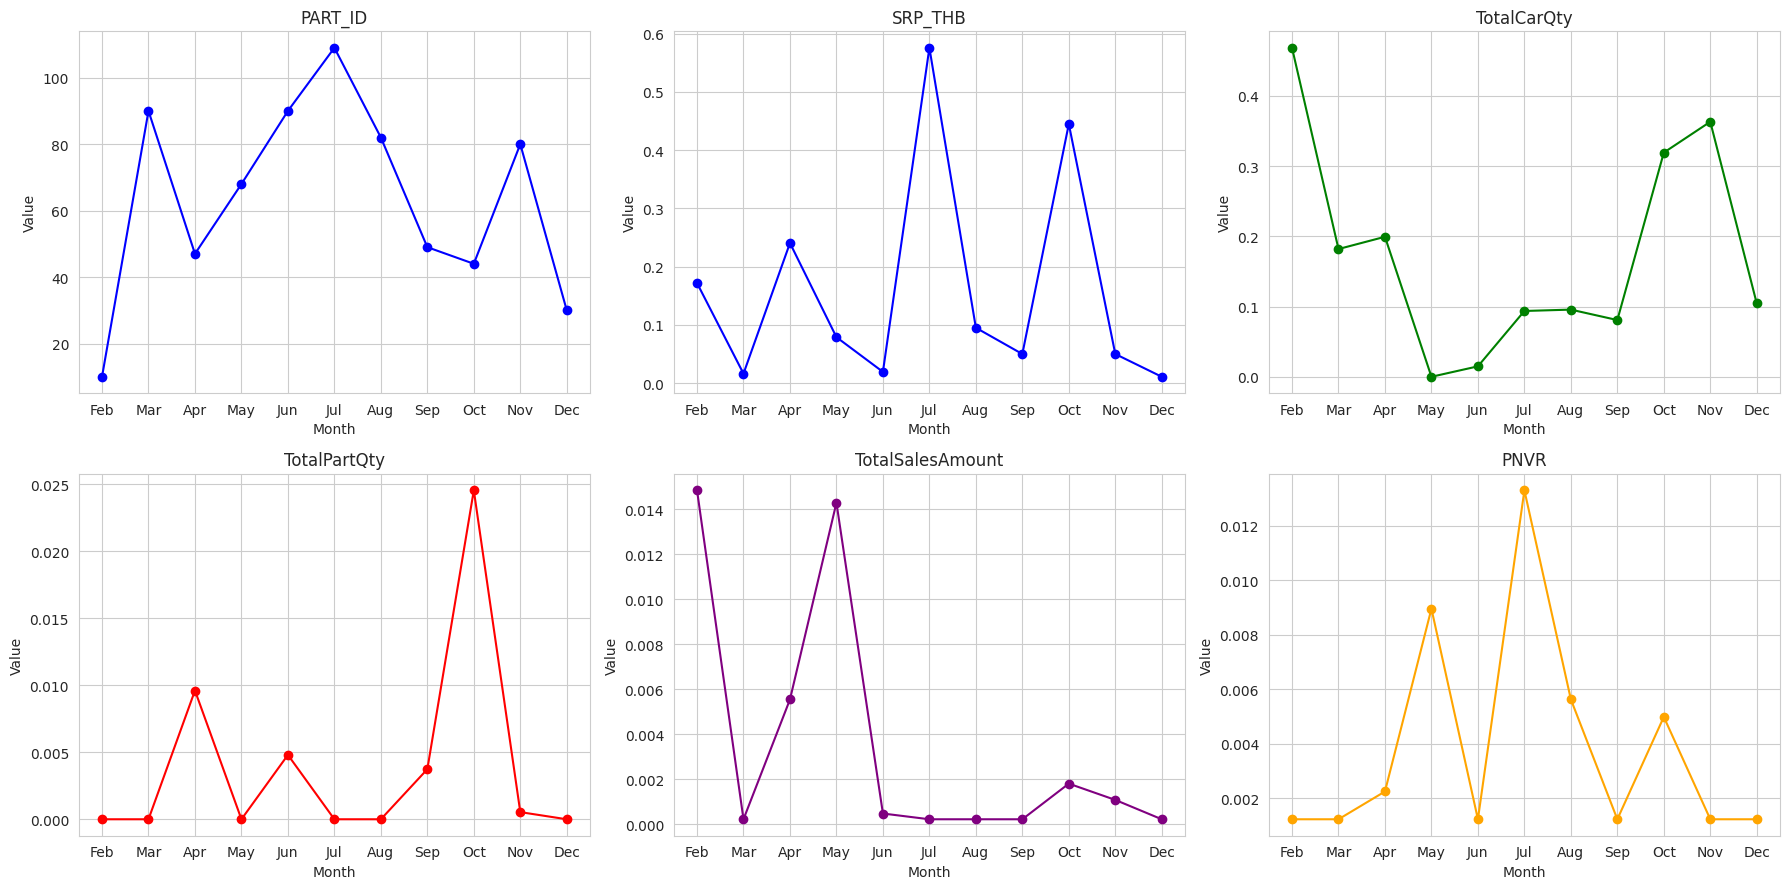

In [ ]:
# กำหนดขนาดของกราฟ
plt.figure(figsize=(18, 9))

# พล็อตกราฟของค่า PART_ID
plt.subplot(2, 3, 1)
plt.plot(new_data['Month'], new_data['PART_ID'], marker='o', color='blue')
plt.title('PART_ID')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า SRP_THB
plt.subplot(2, 3, 2)
plt.plot(new_data['Month'], new_data['SRP_THB'], marker='o', color='blue')
plt.title('SRP_THB')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า TotalCarQty
plt.subplot(2, 3, 3)
plt.plot(new_data['Month'], new_data['TotalCarQty'], marker='o', color='green')
plt.title('TotalCarQty')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า TotalPartQty
plt.subplot(2, 3, 4)
plt.plot(new_data['Month'], new_data['TotalPartQty'], marker='o', color='red')
plt.title('TotalPartQty')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า TotalSalesAmount
plt.subplot(2, 3, 5)
plt.plot(new_data['Month'], new_data['TotalSalesAmount'], marker='o', color='purple')
plt.title('TotalSalesAmount')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า PNVR
plt.subplot(2, 3, 6)
plt.plot(new_data['Month'], new_data['PNVR'], marker='o', color='orange')
plt.title('PNVR')
plt.xlabel('Month')
plt.ylabel('Value')

# แสดงกราฟทั้งหมด
plt.tight_layout()
plt.show()

การสร้างข้อมูลใหม่โดยการสุ่มค่าจากข้อมูลเดิมเป็นวิธีการที่ดีเพื่อทดสอบโมเดล แต่ควรทราบว่าการสุ่มค่าอาจทำให้ข้อมูลทดสอบไม่แทนความเป็นจริงได้อย่างแม่นยำทั้งหมด เนื่องจากมันไม่สามารถแทนความสัมพันธ์และโครงสร้างของข้อมูลได้อย่างแม่นยำเสมอได้ การสุ่มค่านั้นมักจะใช้เพื่อทดสอบความทนทานและประสิทธิภาพของโมเดลในสถานการณ์ที่เป็นไปได้หลากหลาย หากต้องการความแม่นยำที่สูงที่สุดในการทดสอบ ควรใช้ข้อมูลจริงๆ ที่ไม่ได้ถูกสุ่มมา เพราะจะสะท้อนความเป็นจริงของสถานการณ์ได้ดีกว่า



การสร้างข้อมูลทดสอบด้วยการสุ่มใหม่นั้นสามารถช่วยให้เราเห็นว่าโมเดลของเราทำงานได้ดีกับข้อมูลที่มีความหลากหลายหรือไม่ และยังช่วยให้เห็นถึงประสิทธิภาพของโมเดลในเงื่อนไขที่แตกต่างกันได้ด้วย เช่น การทดสอบกับข้อมูลที่สร้างขึ้นจากการสุ่มอาจช่วยให้เห็นถึงปัญหาของโมเดลในการจัดกลุ่มข้อมูลที่ไม่เหมือนกัน หรือในการทำนายข้อมูลที่มีค่าสูงหรือต่ำกว่าข้อมูลจริง

ดังนั้น การสร้างข้อมูลทดสอบโดยการสุ่มค่าอาจไม่ให้ความแม่นยำที่สูงที่สุด แต่ก็เป็นวิธีที่มีประโยชน์ในการทดสอบและปรับปรุงโมเดลให้ดียิ่งขึ้นในสถานการณ์ที่แตกต่างกันได้

# ผลทำนายล่วงหน้าของเดือน feb-dec 2024 จากชุดข้อมูลใหม่

Random Forest Predictions for Feb-Dec 2024:
Prediction for Feb-2024: 0.00%
Prediction for Mar-2024: 0.00%
Prediction for Apr-2024: 0.29%
Prediction for May-2024: 0.05%
Prediction for Jun-2024: 1.81%
Prediction for Jul-2024: 0.05%
Prediction for Aug-2024: 0.01%
Prediction for Sep-2024: 0.28%
Prediction for Oct-2024: 0.47%
Prediction for Nov-2024: 0.01%
Prediction for Dec-2024: 0.00%

*************************** Plot Graph ***************************



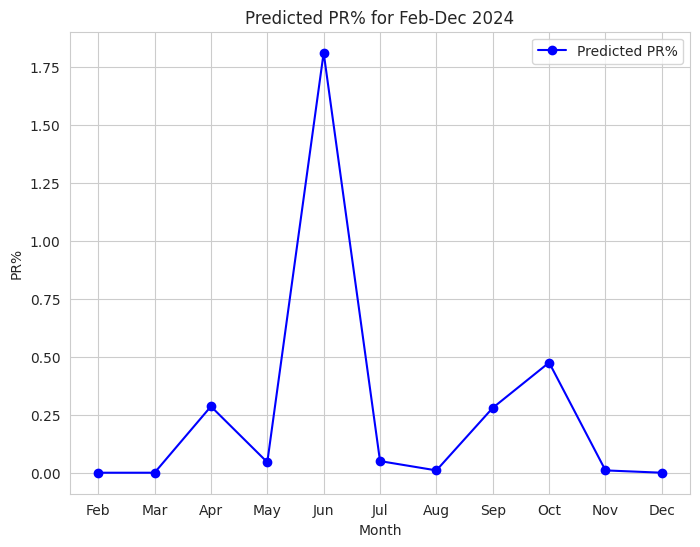

In [ ]:
# ทำนายด้วยโมเดล Random Forest และแสดงผลลัพธ์
from joblib import load
import matplotlib.pyplot as plt

# โหลดโมเดล Random Forest ที่เราสร้างไว้ก่อนหน้า
loaded_rf_model = load('/content/random_forest_model.joblib')

# เตรียมข้อมูลที่ใช้ทำนาย
X_new = new_data.drop(['Month'], axis=1)  # เอาคอลัมน์ที่ไม่ใช่คุณลักษณะไป
# ใช้โมเดล Random Forest ทำนายค่า PR%
rf_new_pred = loaded_rf_model.predict(X_new)

# แสดงผลลัพธ์การทำนาย
print("Random Forest Predictions for Feb-Dec 2024:")
for i, pred in enumerate(rf_new_pred):
    print(f"Prediction for {month_names[i]}-{year}: {pred:.2f}%")
print()
print('*************************** Plot Graph ***************************')
print()

# แสดงผลลัพธ์ที่ทำนายเป็นกราฟ
plt.figure(figsize=(8, 6))
plt.plot(month_names, rf_new_pred, marker='o', linestyle='-', color='b', label='Predicted PR%')
plt.title('Predicted PR% for Feb-Dec 2024')
plt.xlabel('Month')
plt.ylabel('PR%')
plt.xticks(month_names)  # กำหนดชื่อเดือนให้แกน x
plt.grid(True)
plt.legend()
plt.show()

# สำหรับ 1 รายการ  เช่นของ part 0010 ช่วงเดือน 2-12

ต้อง Normalize ข้อมูลก่อนจะสร้างข้อมูลใหม่

In [ ]:
import numpy as np
import pandas as pd

# สร้าง DataFrame ใหม่
new_data = pd.DataFrame(columns=['Year','PART_ID', 'CATEGORY', 'SRP_THB', 'TotalCarQty', 'TotalPartQty', 'TotalSalesAmount', 'PNVR'])

# กำหนดข้อมูลปีและเดือน
year = 2024
months = range(1, 12)  # เดือน Feb-Dec
month_names = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# สุ่มข้อมูลและเพิ่มลงใน DataFrame
for month in months:
    new_row = {
        'Year': year,
        'PART_ID':'10',
        'CATEGORY': np.random.choice(df['CATEGORY']),
        'SRP_THB': np.random.choice(df['SRP_THB']),
        'TotalCarQty': np.random.choice(df['TotalCarQty']),
        'TotalPartQty': np.random.choice(df['TotalPartQty']),
        'TotalSalesAmount': np.random.choice(df['TotalSalesAmount']),
        'PNVR': np.random.choice(df['PNVR']),
        'Month': month_names[month - 1]  # แปลงตัวเลขเดือนเป็นชื่อเดือน
    }
    new_data = new_data.append(new_row, ignore_index=True)

# แสดง DataFrame ใหม่
new_data

<ipython-input-279-908bd692f3ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-279-908bd692f3ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-279-908bd692f3ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-279-908bd692f3ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
<ipython-input-279-908bd692f3ae>:25: FutureWarning: The frame.append method is deprecated an

,Year,PART_ID,CATEGORY,SRP_THB,TotalCarQty,TotalPartQty,TotalSalesAmount,PNVR,Month
0,2024,10,2,0.033677,0.080994,0.001602,0.000223,0.001233,Feb
1,2024,10,1,0.052525,0.077444,0.005873,0.001073,0.001769,Mar
2,2024,10,1,0.040404,0.145208,0.001068,0.000223,0.002144,Apr
3,2024,10,1,0.038384,0.017102,0.008009,0.000223,0.027607,May
4,2024,10,1,0.008081,0.156502,0.000000,0.001403,0.003324,Jun
5,2024,10,1,0.236364,0.229752,0.000534,0.000356,0.001233,Jul
6,2024,10,3,0.018182,0.349145,0.001068,0.000223,0.004020,Aug
7,2024,10,1,0.051515,0.014521,0.068340,0.000223,0.005414,Sep
8,2024,10,1,0.016162,0.631494,0.008542,0.000223,0.003699,Oct
9,2024,10,2,0.464646,0.014198,0.000000,0.000267,0.073600,Nov


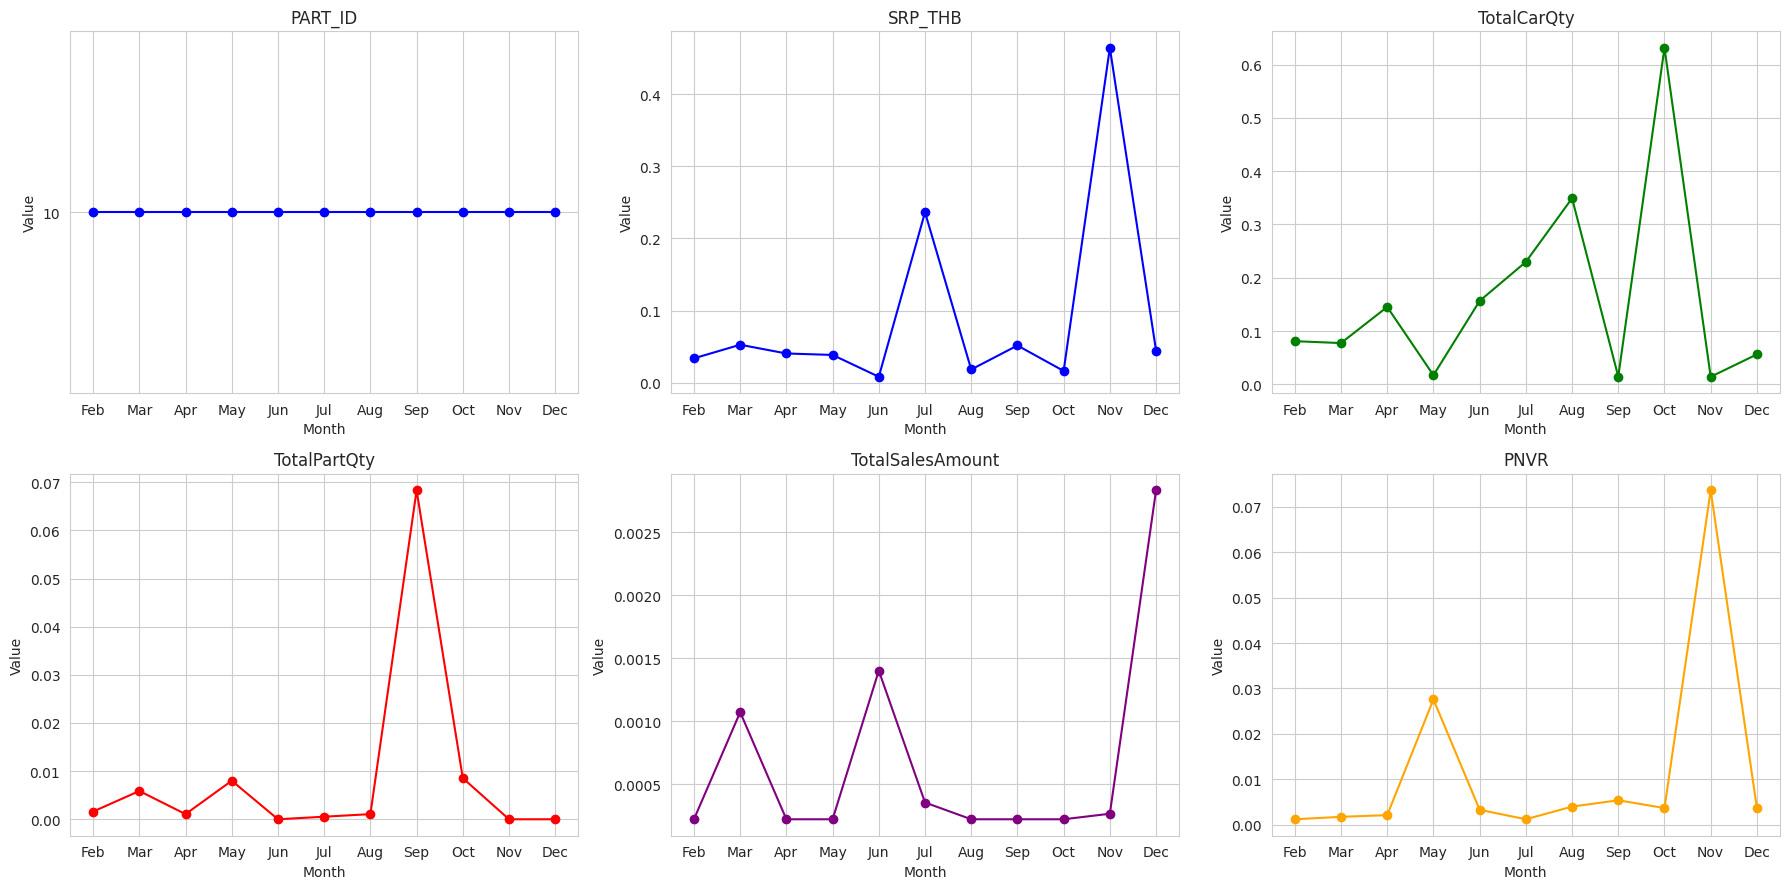

In [ ]:
# กำหนดขนาดของกราฟ
plt.figure(figsize=(18, 9))

# พล็อตกราฟของค่า PART_ID
plt.subplot(2, 3, 1)
plt.plot(new_data['Month'], new_data['PART_ID'], marker='o', color='blue')
plt.title('PART_ID')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า SRP_THB
plt.subplot(2, 3, 2)
plt.plot(new_data['Month'], new_data['SRP_THB'], marker='o', color='blue')
plt.title('SRP_THB')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า TotalCarQty
plt.subplot(2, 3, 3)
plt.plot(new_data['Month'], new_data['TotalCarQty'], marker='o', color='green')
plt.title('TotalCarQty')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า TotalPartQty
plt.subplot(2, 3, 4)
plt.plot(new_data['Month'], new_data['TotalPartQty'], marker='o', color='red')
plt.title('TotalPartQty')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า TotalSalesAmount
plt.subplot(2, 3, 5)
plt.plot(new_data['Month'], new_data['TotalSalesAmount'], marker='o', color='purple')
plt.title('TotalSalesAmount')
plt.xlabel('Month')
plt.ylabel('Value')

# พล็อตกราฟของค่า PNVR
plt.subplot(2, 3, 6)
plt.plot(new_data['Month'], new_data['PNVR'], marker='o', color='orange')
plt.title('PNVR')
plt.xlabel('Month')
plt.ylabel('Value')

# แสดงกราฟทั้งหมด
plt.tight_layout()
plt.show()

Random Forest Predictions for Feb-Dec 2024:
Prediction for Feb-2024: 0.12%
Prediction for Mar-2024: 0.46%
Prediction for Apr-2024: 0.04%
Prediction for May-2024: 3.25%
Prediction for Jun-2024: 0.00%
Prediction for Jul-2024: 0.01%
Prediction for Aug-2024: 0.02%
Prediction for Sep-2024: 5.20%
Prediction for Oct-2024: 0.17%
Prediction for Nov-2024: 0.84%
Prediction for Dec-2024: 0.00%

*************************** Plot Graph ***************************



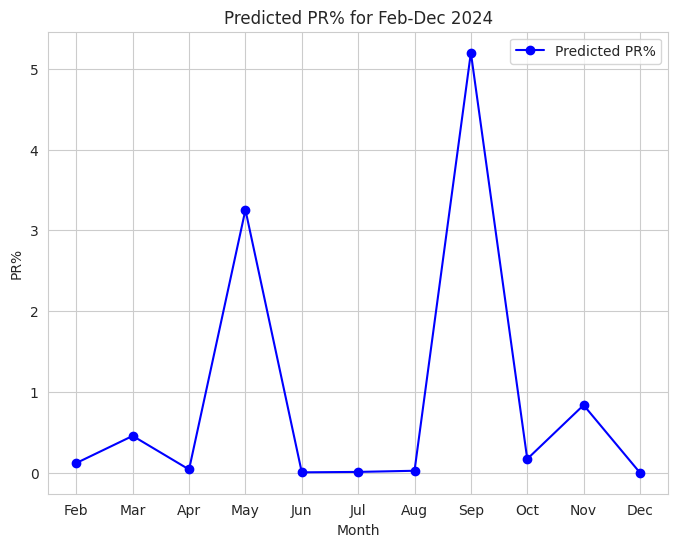

In [ ]:
# ทำนายด้วยโมเดล Random Forest และแสดงผลลัพธ์
from joblib import load
import matplotlib.pyplot as plt

# โหลดโมเดล Random Forest ที่เราสร้างไว้ก่อนหน้า
loaded_rf_model = load('/content/random_forest_model.joblib')

# เตรียมข้อมูลที่ใช้ทำนาย
X_new = new_data.drop(['Month'], axis=1)  # เอาคอลัมน์ที่ไม่ใช่คุณลักษณะไป
# ใช้โมเดล Random Forest ทำนายค่า PR%
rf_new_pred = loaded_rf_model.predict(X_new)

# แสดงผลลัพธ์การทำนาย
print("Random Forest Predictions for Feb-Dec 2024:")
for i, pred in enumerate(rf_new_pred):
    print(f"Prediction for {month_names[i]}-{year}: {pred:.2f}%")
print()
print('*************************** Plot Graph ***************************')
print()

# แสดงผลลัพธ์ที่ทำนายเป็นกราฟ
plt.figure(figsize=(8, 6))
plt.plot(month_names, rf_new_pred, marker='o', linestyle='-', color='b', label='Predicted PR%')
plt.title('Predicted PR% for Feb-Dec 2024')
plt.xlabel('Month')
plt.ylabel('PR%')
plt.xticks(month_names)  # กำหนดชื่อเดือนให้แกน x
plt.grid(True)
plt.legend()
plt.show()

# สรุปประสิทธิภาพของแต่ละโมเดล

# MSE, RMSE มีค่ายิ่งต่ำยิ่งดี ถ้าเท่ากับ 0 แปลว่าโมเดลทำนายค่า y ได้ถูกต้องเป๊ะ 100% ในทางปฏิบัติโอกาสที่จะเทรนโมเดลได้ loss = 0 เป็นไปได้ยากมาก

# R2 หรือ R-Squared อธิบายง่ายๆ R2 คือ variance ที่โมเดลของเราอธิบายได้เป็นสัดส่วนจาก total variance ทั้งหมดของข้อมูลชุดนั้น (นักสถิติใช้สูตรคำนวณ total variance = explained variance + error) โดย R2 จะมีค่าอยู่ระหว่าง 0-1 ยิ่งเข้าใกล้ 1 แปลว่าโมเดลเราทำนายผลได้ดีมากเลยครับ

ด้วยผลลัพธ์ที่ได้จากการวัดประสิทธิภาพของโมเดลต่าง ๆ
จากผลลัพธ์ดังกล่าว เราสามารถสรุปได้ว่า:


*   Random Forest ให้ผลลัพธ์ที่ดีที่สุดโดยมีค่า RMSE  และค่า MSE ที่ต่ำที่สุด ส่วน R^2 มีค่าสูงที่สุด

*   ARIMA ให้ผลลัพธ์ที่แย่ที่สุดโดยมีค่า RMSE, MSE สูง และ R^2 ที่ต่ำที่สุด ซึ่งหมายความว่าโมเดล ARIMA ไม่เหมาะสมกับข้อมูลในที่นี้
